In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
dados_totais = pd.read_csv('datasus_SIH.csv', encoding='cp850', sep=';', engine='python')
dados_totais

,Municipio,valor_2013,valor_2014,valor_2015,valor_2016,valor_2017,valor_2018,valor_2019,valor_2020,valor_2021,...,dias_2014,dias_2015,dias_2016,dias_2017,dias_2018,dias_2019,dias_2020,dias_2021,dias_2022,dias_Total
0,110001 ALTA FLORESTA D'OESTE,7.254870e+05,7.608883e+05,7.241162e+05,6.262698e+05,6.263432e+05,6.536694e+05,6.961739e+05,4.803190e+05,6.682437e+05,...,5508.0,5567.0,4671.0,4614.0,4940.0,5553.0,3294.0,3750.0,5047.0,48319.0
1,110002 ARIQUEMES,3.708151e+06,3.463929e+06,3.973057e+06,4.382049e+06,4.502478e+06,4.342874e+06,4.548937e+06,7.196513e+06,1.478188e+07,...,14364.0,15934.0,16348.0,17580.0,15801.0,17258.0,16476.0,24510.0,20054.0,174617.0
2,110003 CABIXI,8.986483e+04,8.940387e+04,9.218784e+04,1.002236e+05,9.738775e+04,8.062843e+04,8.619075e+04,7.649719e+04,1.449199e+05,...,646.0,718.0,751.0,739.0,717.0,778.0,689.0,627.0,618.0,6965.0
3,110004 CACOAL,5.081347e+06,7.392915e+06,7.533927e+06,9.580908e+06,1.005418e+07,1.124636e+07,1.160320e+07,8.557085e+06,1.115655e+07,...,53025.0,58399.0,67645.0,70190.0,77004.0,75790.0,53225.0,50888.0,68025.0,628115.0
4,110005 CEREJEIRAS,5.226433e+05,4.911237e+05,5.659651e+05,4.833086e+05,4.461848e+05,4.601988e+05,3.538571e+05,2.869115e+05,4.746083e+05,...,4154.0,4319.0,4014.0,3986.0,4084.0,3423.0,2399.0,2567.0,3196.0,36311.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,MUNICIPIO IGNORADO DF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5595,530010 BRASILIA,7.455151e+07,7.163232e+07,6.447170e+07,8.312261e+07,9.664232e+07,2.331153e+08,2.398669e+08,2.653910e+08,3.382575e+08,...,436627.0,423514.0,464357.0,528581.0,1308823.0,1324112.0,1164460.0,1279779.0,1320261.0,8711175.0
5596,Total,1.258605e+10,1.325714e+10,1.367493e+10,1.388359e+10,1.441007e+10,1.510639e+10,1.581605e+10,1.638552e+10,2.237367e+10,...,63185077.0,62987730.0,62052126.0,61560115.0,62859674.0,63968481.0,57012580.0,63867782.0,65237649.0,626173115.0
5597,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(type(dados_totais))
print('---------')
print(dados_totais.shape)
print('---------')
print(dados_totais.dtypes)

<class 'pandas.core.frame.DataFrame'>
---------
(5599, 155)
---------
Municipio      object
valor_2013    float64
valor_2014    float64
valor_2015    float64
valor_2016    float64
               ...   
dias_2019     float64
dias_2020     float64
dias_2021     float64
dias_2022     float64
dias_Total    float64
Length: 155, dtype: object


In [4]:
# Renomear coluna do município
dados_totais = dados_totais.rename(columns={'Municipio': 'municipio'})

dados_totais

,municipio,valor_2013,valor_2014,valor_2015,valor_2016,valor_2017,valor_2018,valor_2019,valor_2020,valor_2021,...,dias_2014,dias_2015,dias_2016,dias_2017,dias_2018,dias_2019,dias_2020,dias_2021,dias_2022,dias_Total
0,110001 ALTA FLORESTA D'OESTE,7.254870e+05,7.608883e+05,7.241162e+05,6.262698e+05,6.263432e+05,6.536694e+05,6.961739e+05,4.803190e+05,6.682437e+05,...,5508.0,5567.0,4671.0,4614.0,4940.0,5553.0,3294.0,3750.0,5047.0,48319.0
1,110002 ARIQUEMES,3.708151e+06,3.463929e+06,3.973057e+06,4.382049e+06,4.502478e+06,4.342874e+06,4.548937e+06,7.196513e+06,1.478188e+07,...,14364.0,15934.0,16348.0,17580.0,15801.0,17258.0,16476.0,24510.0,20054.0,174617.0
2,110003 CABIXI,8.986483e+04,8.940387e+04,9.218784e+04,1.002236e+05,9.738775e+04,8.062843e+04,8.619075e+04,7.649719e+04,1.449199e+05,...,646.0,718.0,751.0,739.0,717.0,778.0,689.0,627.0,618.0,6965.0
3,110004 CACOAL,5.081347e+06,7.392915e+06,7.533927e+06,9.580908e+06,1.005418e+07,1.124636e+07,1.160320e+07,8.557085e+06,1.115655e+07,...,53025.0,58399.0,67645.0,70190.0,77004.0,75790.0,53225.0,50888.0,68025.0,628115.0
4,110005 CEREJEIRAS,5.226433e+05,4.911237e+05,5.659651e+05,4.833086e+05,4.461848e+05,4.601988e+05,3.538571e+05,2.869115e+05,4.746083e+05,...,4154.0,4319.0,4014.0,3986.0,4084.0,3423.0,2399.0,2567.0,3196.0,36311.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,MUNICIPIO IGNORADO DF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5595,530010 BRASILIA,7.455151e+07,7.163232e+07,6.447170e+07,8.312261e+07,9.664232e+07,2.331153e+08,2.398669e+08,2.653910e+08,3.382575e+08,...,436627.0,423514.0,464357.0,528581.0,1308823.0,1324112.0,1164460.0,1279779.0,1320261.0,8711175.0
5596,Total,1.258605e+10,1.325714e+10,1.367493e+10,1.388359e+10,1.441007e+10,1.510639e+10,1.581605e+10,1.638552e+10,2.237367e+10,...,63185077.0,62987730.0,62052126.0,61560115.0,62859674.0,63968481.0,57012580.0,63867782.0,65237649.0,626173115.0
5597,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# tirar as linhas que contenham municipio ignorado.
dados_totais = dados_totais[dados_totais['municipio'].apply(lambda x: x is not None and 'MUNICIPIO IGNORADO' not in x)]
dados_totais

,municipio,valor_2013,valor_2014,valor_2015,valor_2016,valor_2017,valor_2018,valor_2019,valor_2020,valor_2021,...,dias_2014,dias_2015,dias_2016,dias_2017,dias_2018,dias_2019,dias_2020,dias_2021,dias_2022,dias_Total
0,110001 ALTA FLORESTA D'OESTE,7.254870e+05,7.608883e+05,7.241162e+05,6.262698e+05,6.263432e+05,6.536694e+05,6.961739e+05,4.803190e+05,6.682437e+05,...,5508.0,5567.0,4671.0,4614.0,4940.0,5553.0,3294.0,3750.0,5047.0,48319.0
1,110002 ARIQUEMES,3.708151e+06,3.463929e+06,3.973057e+06,4.382049e+06,4.502478e+06,4.342874e+06,4.548937e+06,7.196513e+06,1.478188e+07,...,14364.0,15934.0,16348.0,17580.0,15801.0,17258.0,16476.0,24510.0,20054.0,174617.0
2,110003 CABIXI,8.986483e+04,8.940387e+04,9.218784e+04,1.002236e+05,9.738775e+04,8.062843e+04,8.619075e+04,7.649719e+04,1.449199e+05,...,646.0,718.0,751.0,739.0,717.0,778.0,689.0,627.0,618.0,6965.0
3,110004 CACOAL,5.081347e+06,7.392915e+06,7.533927e+06,9.580908e+06,1.005418e+07,1.124636e+07,1.160320e+07,8.557085e+06,1.115655e+07,...,53025.0,58399.0,67645.0,70190.0,77004.0,75790.0,53225.0,50888.0,68025.0,628115.0
4,110005 CEREJEIRAS,5.226433e+05,4.911237e+05,5.659651e+05,4.833086e+05,4.461848e+05,4.601988e+05,3.538571e+05,2.869115e+05,4.746083e+05,...,4154.0,4319.0,4014.0,3986.0,4084.0,3423.0,2399.0,2567.0,3196.0,36311.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5593,522230 VILA PROPICIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5595,530010 BRASILIA,7.455151e+07,7.163232e+07,6.447170e+07,8.312261e+07,9.664232e+07,2.331153e+08,2.398669e+08,2.653910e+08,3.382575e+08,...,436627.0,423514.0,464357.0,528581.0,1308823.0,1324112.0,1164460.0,1279779.0,1320261.0,8711175.0
5596,Total,1.258605e+10,1.325714e+10,1.367493e+10,1.388359e+10,1.441007e+10,1.510639e+10,1.581605e+10,1.638552e+10,2.237367e+10,...,63185077.0,62987730.0,62052126.0,61560115.0,62859674.0,63968481.0,57012580.0,63867782.0,65237649.0,626173115.0
5597,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#tirei tbm as tres ultimas linhas
dados_totais = dados_totais.iloc[:-3]
dados_totais

,municipio,valor_2013,valor_2014,valor_2015,valor_2016,valor_2017,valor_2018,valor_2019,valor_2020,valor_2021,...,dias_2014,dias_2015,dias_2016,dias_2017,dias_2018,dias_2019,dias_2020,dias_2021,dias_2022,dias_Total
0,110001 ALTA FLORESTA D'OESTE,725487.04,760888.27,724116.20,626269.75,626343.21,6.536694e+05,6.961739e+05,4.803190e+05,6.682437e+05,...,5508.0,5567.0,4671.0,4614.0,4940.0,5553.0,3294.0,3750.0,5047.0,48319.0
1,110002 ARIQUEMES,3708151.19,3463928.54,3973057.43,4382048.70,4502478.44,4.342874e+06,4.548937e+06,7.196513e+06,1.478188e+07,...,14364.0,15934.0,16348.0,17580.0,15801.0,17258.0,16476.0,24510.0,20054.0,174617.0
2,110003 CABIXI,89864.83,89403.87,92187.84,100223.63,97387.75,8.062843e+04,8.619075e+04,7.649719e+04,1.449199e+05,...,646.0,718.0,751.0,739.0,717.0,778.0,689.0,627.0,618.0,6965.0
3,110004 CACOAL,5081347.01,7392914.64,7533927.08,9580907.92,10054183.76,1.124636e+07,1.160320e+07,8.557085e+06,1.115655e+07,...,53025.0,58399.0,67645.0,70190.0,77004.0,75790.0,53225.0,50888.0,68025.0,628115.0
4,110005 CEREJEIRAS,522643.32,491123.65,565965.05,483308.62,446184.84,4.601988e+05,3.538571e+05,2.869115e+05,4.746083e+05,...,4154.0,4319.0,4014.0,3986.0,4084.0,3423.0,2399.0,2567.0,3196.0,36311.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590,522200 VIANOPOLIS,423968.57,394169.84,324303.99,284435.18,288963.32,3.314020e+05,2.995028e+05,2.739463e+05,4.186292e+05,...,3287.0,2674.0,2601.0,2573.0,3078.0,2781.0,2609.0,2840.0,3607.0,29488.0
5591,522205 VICENTINOPOLIS,64744.19,65571.74,44772.18,39252.53,76204.07,1.041283e+05,1.272859e+05,1.406667e+05,1.568381e+05,...,370.0,362.0,307.0,477.0,635.0,705.0,747.0,534.0,545.0,5100.0
5592,522220 VILA BOA,51512.08,13115.73,9375.07,11457.24,24336.97,NaN,NaN,NaN,NaN,...,96.0,81.0,77.0,166.0,NaN,NaN,NaN,NaN,NaN,721.0
5593,522230 VILA PROPICIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Separar o código do IBGE em uma coluna separada para usá-lo como key
dados_totais['cod_ibge'] = dados_totais['municipio'].str.split(" ", n=1, expand = True)[0]
dados_totais['municipio'] = dados_totais['municipio'].str.split(" ", n=1, expand = True)[1]
dados_totais.head(10)

C:\Users\Rosana\AppData\Local\Temp\ipykernel_14056\1643107165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_totais['cod_ibge'] = dados_totais['municipio'].str.split(" ", n=1, expand = True)[0]
C:\Users\Rosana\AppData\Local\Temp\ipykernel_14056\1643107165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_totais['municipio'] = dados_totais['municipio'].str.split(" ", n=1, expand = True)[1]


,municipio,valor_2013,valor_2014,valor_2015,valor_2016,valor_2017,valor_2018,valor_2019,valor_2020,valor_2021,...,dias_2015,dias_2016,dias_2017,dias_2018,dias_2019,dias_2020,dias_2021,dias_2022,dias_Total,cod_ibge
0,ALTA FLORESTA D'OESTE,725487.04,760888.27,724116.20,626269.75,626343.21,653669.39,696173.92,480319.05,668243.67,...,5567.0,4671.0,4614.0,4940.0,5553.0,3294.0,3750.0,5047.0,48319.0,110001
1,ARIQUEMES,3708151.19,3463928.54,3973057.43,4382048.70,4502478.44,4342873.72,4548936.72,7196513.03,14781878.61,...,15934.0,16348.0,17580.0,15801.0,17258.0,16476.0,24510.0,20054.0,174617.0,110002
2,CABIXI,89864.83,89403.87,92187.84,100223.63,97387.75,80628.43,86190.75,76497.19,144919.85,...,718.0,751.0,739.0,717.0,778.0,689.0,627.0,618.0,6965.0,110003
3,CACOAL,5081347.01,7392914.64,7533927.08,9580907.92,10054183.76,11246364.82,11603201.67,8557084.62,11156551.85,...,58399.0,67645.0,70190.0,77004.0,75790.0,53225.0,50888.0,68025.0,628115.0,110004
4,CEREJEIRAS,522643.32,491123.65,565965.05,483308.62,446184.84,460198.78,353857.08,286911.49,474608.34,...,4319.0,4014.0,3986.0,4084.0,3423.0,2399.0,2567.0,3196.0,36311.0,110005
5,COLORADO DO OESTE,325078.21,306163.93,232823.31,218079.84,292923.87,264368.42,423628.29,218951.21,322547.31,...,2795.0,2417.0,2699.0,2783.0,2497.0,1583.0,1948.0,1810.0,23724.0,110006
6,CORUMBIARA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110007
7,COSTA MARQUES,51545.52,209932.96,55086.19,70431.22,123706.12,186081.30,121080.82,59412.47,65686.12,...,412.0,482.0,983.0,1513.0,805.0,504.0,659.0,815.0,8044.0,110008
8,ESPIGAO D'OESTE,470721.42,413204.14,460115.79,494452.79,520419.77,674577.39,757458.10,515591.00,569360.52,...,4593.0,4428.0,4899.0,6304.0,6289.0,3245.0,2711.0,3741.0,45733.0,110009
9,GUAJARAMIRIM,1153345.13,1219205.48,1228989.72,1059436.98,1433448.39,1374973.30,1250554.28,1408957.99,1566003.38,...,9102.0,8331.0,11186.0,10988.0,10091.0,8694.0,9575.0,10716.0,97091.0,110010


In [8]:
dados_totais['Cod_UF'] = dados_totais['cod_ibge'].str[:2]
dados_totais

C:\Users\Rosana\AppData\Local\Temp\ipykernel_14056\3186509524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_totais['Cod_UF'] = dados_totais['cod_ibge'].str[:2]


,municipio,valor_2013,valor_2014,valor_2015,valor_2016,valor_2017,valor_2018,valor_2019,valor_2020,valor_2021,...,dias_2016,dias_2017,dias_2018,dias_2019,dias_2020,dias_2021,dias_2022,dias_Total,cod_ibge,Cod_UF
0,ALTA FLORESTA D'OESTE,725487.04,760888.27,724116.20,626269.75,626343.21,6.536694e+05,6.961739e+05,4.803190e+05,6.682437e+05,...,4671.0,4614.0,4940.0,5553.0,3294.0,3750.0,5047.0,48319.0,110001,11
1,ARIQUEMES,3708151.19,3463928.54,3973057.43,4382048.70,4502478.44,4.342874e+06,4.548937e+06,7.196513e+06,1.478188e+07,...,16348.0,17580.0,15801.0,17258.0,16476.0,24510.0,20054.0,174617.0,110002,11
2,CABIXI,89864.83,89403.87,92187.84,100223.63,97387.75,8.062843e+04,8.619075e+04,7.649719e+04,1.449199e+05,...,751.0,739.0,717.0,778.0,689.0,627.0,618.0,6965.0,110003,11
3,CACOAL,5081347.01,7392914.64,7533927.08,9580907.92,10054183.76,1.124636e+07,1.160320e+07,8.557085e+06,1.115655e+07,...,67645.0,70190.0,77004.0,75790.0,53225.0,50888.0,68025.0,628115.0,110004,11
4,CEREJEIRAS,522643.32,491123.65,565965.05,483308.62,446184.84,4.601988e+05,3.538571e+05,2.869115e+05,4.746083e+05,...,4014.0,3986.0,4084.0,3423.0,2399.0,2567.0,3196.0,36311.0,110005,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590,VIANOPOLIS,423968.57,394169.84,324303.99,284435.18,288963.32,3.314020e+05,2.995028e+05,2.739463e+05,4.186292e+05,...,2601.0,2573.0,3078.0,2781.0,2609.0,2840.0,3607.0,29488.0,522200,52
5591,VICENTINOPOLIS,64744.19,65571.74,44772.18,39252.53,76204.07,1.041283e+05,1.272859e+05,1.406667e+05,1.568381e+05,...,307.0,477.0,635.0,705.0,747.0,534.0,545.0,5100.0,522205,52
5592,VILA BOA,51512.08,13115.73,9375.07,11457.24,24336.97,NaN,NaN,NaN,NaN,...,77.0,166.0,NaN,NaN,NaN,NaN,NaN,721.0,522220,52
5593,VILA PROPICIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,522230,52


In [9]:
# Criando UF e região
CondUF =  [(dados_totais['Cod_UF'] == '11'),
         (dados_totais["Cod_UF"] == '12'),
         (dados_totais["Cod_UF"] == '13'),
         (dados_totais["Cod_UF"] == '14'),
         (dados_totais["Cod_UF"] == '15'),
         (dados_totais["Cod_UF"] == '16'),
         (dados_totais["Cod_UF"] == '17'),
         (dados_totais["Cod_UF"] == '21'),
         (dados_totais["Cod_UF"] == '22'),
         (dados_totais["Cod_UF"] == '23'),
         (dados_totais["Cod_UF"] == '24'),
         (dados_totais["Cod_UF"] == '25'),
         (dados_totais["Cod_UF"] == '26'),
         (dados_totais["Cod_UF"] == '27'),
         (dados_totais["Cod_UF"] == '28'),
         (dados_totais["Cod_UF"] == '29'),
         (dados_totais["Cod_UF"] == '31'),
         (dados_totais["Cod_UF"] == '32'),
         (dados_totais["Cod_UF"] == '33'),
         (dados_totais["Cod_UF"] == '35'),
         (dados_totais["Cod_UF"] == '41'),
         (dados_totais["Cod_UF"] == '42'),
         (dados_totais["Cod_UF"] == '43'),
         (dados_totais["Cod_UF"] == '50'),
         (dados_totais["Cod_UF"] == '51'),
         (dados_totais["Cod_UF"] == '52'),
         (dados_totais["Cod_UF"] == '53')
         ]
          
UF_nomes = ['RO','AC','AM','RR','PA','AP','TO','MA','PI','CE','RN','PB','PE','AL','SE','BA','MG','ES','RJ','SP','PR','SC','RS','MS','MT','GO','DF']
dados_totais["UF"] = np.select(CondUF, UF_nomes, default="Error")

CondReg =  [(dados_totais['Cod_UF'] == '11') | (dados_totais["Cod_UF"] == '12') | (dados_totais["Cod_UF"] == '13') | (dados_totais["Cod_UF"] == '14') | (dados_totais["Cod_UF"] == '15') | (dados_totais["Cod_UF"] == '16') | (dados_totais["Cod_UF"] == '17'),
            (dados_totais["Cod_UF"] == '21') | (dados_totais["Cod_UF"] == '22') | (dados_totais["Cod_UF"] == '23') | (dados_totais["Cod_UF"] == '24') | (dados_totais["Cod_UF"] == '25') | (dados_totais["Cod_UF"] == '26') | (dados_totais["Cod_UF"] == '27') | (dados_totais["Cod_UF"] == '28') | (dados_totais["Cod_UF"] == '29'),
            (dados_totais["Cod_UF"] == '31') | (dados_totais["Cod_UF"] == '32') | (dados_totais["Cod_UF"] == '33') | (dados_totais["Cod_UF"] == '35'),
            (dados_totais["Cod_UF"] == '41') | (dados_totais["Cod_UF"] == '42') | (dados_totais["Cod_UF"] == '43'),
            (dados_totais["Cod_UF"] == '50') | (dados_totais["Cod_UF"] == '51') | (dados_totais["Cod_UF"] == '52') | (dados_totais["Cod_UF"] == '53')
           ]
            
Regiao_nomes = ['Norte','Nordeste','Sudeste','Sul','Centro-Oeste']
dados_totais["regiao"] = np.select(CondReg, Regiao_nomes, default="Error")
dados_totais

C:\Users\Rosana\AppData\Local\Temp\ipykernel_14056\2982754059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_totais["UF"] = np.select(CondUF, UF_nomes, default="Error")
C:\Users\Rosana\AppData\Local\Temp\ipykernel_14056\2982754059.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_totais["regiao"] = np.select(CondReg, Regiao_nomes, default="Error")


,municipio,valor_2013,valor_2014,valor_2015,valor_2016,valor_2017,valor_2018,valor_2019,valor_2020,valor_2021,...,dias_2018,dias_2019,dias_2020,dias_2021,dias_2022,dias_Total,cod_ibge,Cod_UF,UF,regiao
0,ALTA FLORESTA D'OESTE,725487.04,760888.27,724116.20,626269.75,626343.21,6.536694e+05,6.961739e+05,4.803190e+05,6.682437e+05,...,4940.0,5553.0,3294.0,3750.0,5047.0,48319.0,110001,11,RO,Norte
1,ARIQUEMES,3708151.19,3463928.54,3973057.43,4382048.70,4502478.44,4.342874e+06,4.548937e+06,7.196513e+06,1.478188e+07,...,15801.0,17258.0,16476.0,24510.0,20054.0,174617.0,110002,11,RO,Norte
2,CABIXI,89864.83,89403.87,92187.84,100223.63,97387.75,8.062843e+04,8.619075e+04,7.649719e+04,1.449199e+05,...,717.0,778.0,689.0,627.0,618.0,6965.0,110003,11,RO,Norte
3,CACOAL,5081347.01,7392914.64,7533927.08,9580907.92,10054183.76,1.124636e+07,1.160320e+07,8.557085e+06,1.115655e+07,...,77004.0,75790.0,53225.0,50888.0,68025.0,628115.0,110004,11,RO,Norte
4,CEREJEIRAS,522643.32,491123.65,565965.05,483308.62,446184.84,4.601988e+05,3.538571e+05,2.869115e+05,4.746083e+05,...,4084.0,3423.0,2399.0,2567.0,3196.0,36311.0,110005,11,RO,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590,VIANOPOLIS,423968.57,394169.84,324303.99,284435.18,288963.32,3.314020e+05,2.995028e+05,2.739463e+05,4.186292e+05,...,3078.0,2781.0,2609.0,2840.0,3607.0,29488.0,522200,52,GO,Centro-Oeste
5591,VICENTINOPOLIS,64744.19,65571.74,44772.18,39252.53,76204.07,1.041283e+05,1.272859e+05,1.406667e+05,1.568381e+05,...,635.0,705.0,747.0,534.0,545.0,5100.0,522205,52,GO,Centro-Oeste
5592,VILA BOA,51512.08,13115.73,9375.07,11457.24,24336.97,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,721.0,522220,52,GO,Centro-Oeste
5593,VILA PROPICIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,522230,52,GO,Centro-Oeste


In [10]:
#criando um df so com os dados de valores
colunas = ['municipio', 'valor_2013', 'valor_2014', 'valor_2015', 'valor_2016', 'valor_2017', 'valor_2018', 'valor_2019', 'valor_2020', 'valor_2021', 'valor_2022', 'cod_ibge', 'Cod_UF', 'UF', 'regiao' ]
dados_valor=dados_totais.loc[:,colunas]
dados_valor

,municipio,valor_2013,valor_2014,valor_2015,valor_2016,valor_2017,valor_2018,valor_2019,valor_2020,valor_2021,valor_2022,cod_ibge,Cod_UF,UF,regiao
0,ALTA FLORESTA D'OESTE,725487.04,760888.27,724116.20,626269.75,626343.21,6.536694e+05,6.961739e+05,4.803190e+05,6.682437e+05,5.780542e+05,110001,11,RO,Norte
1,ARIQUEMES,3708151.19,3463928.54,3973057.43,4382048.70,4502478.44,4.342874e+06,4.548937e+06,7.196513e+06,1.478188e+07,6.742578e+06,110002,11,RO,Norte
2,CABIXI,89864.83,89403.87,92187.84,100223.63,97387.75,8.062843e+04,8.619075e+04,7.649719e+04,1.449199e+05,6.757487e+04,110003,11,RO,Norte
3,CACOAL,5081347.01,7392914.64,7533927.08,9580907.92,10054183.76,1.124636e+07,1.160320e+07,8.557085e+06,1.115655e+07,1.118933e+07,110004,11,RO,Norte
4,CEREJEIRAS,522643.32,491123.65,565965.05,483308.62,446184.84,4.601988e+05,3.538571e+05,2.869115e+05,4.746083e+05,4.355129e+05,110005,11,RO,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590,VIANOPOLIS,423968.57,394169.84,324303.99,284435.18,288963.32,3.314020e+05,2.995028e+05,2.739463e+05,4.186292e+05,2.859632e+05,522200,52,GO,Centro-Oeste
5591,VICENTINOPOLIS,64744.19,65571.74,44772.18,39252.53,76204.07,1.041283e+05,1.272859e+05,1.406667e+05,1.568381e+05,1.212662e+05,522205,52,GO,Centro-Oeste
5592,VILA BOA,51512.08,13115.73,9375.07,11457.24,24336.97,NaN,NaN,NaN,NaN,NaN,522220,52,GO,Centro-Oeste
5593,VILA PROPICIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,522230,52,GO,Centro-Oeste


In [11]:
valor_por_uf = dados_valor.groupby('UF')[['valor_2013', 'valor_2014', 'valor_2015', 'valor_2016', 'valor_2017', 'valor_2018', 'valor_2019', 'valor_2020', 'valor_2021', 'valor_2022']].sum()
valor_por_uf

,valor_2013,valor_2014,valor_2015,valor_2016,valor_2017,valor_2018,valor_2019,valor_2020,valor_2021,valor_2022
UF,,,,,,,,,,
AC,3.360589e+07,3.603932e+07,3.726202e+07,4.048715e+07,3.724553e+07,3.443257e+07,3.470960e+07,4.001821e+07,5.068947e+07,4.337799e+07
AL,1.699919e+08,1.635852e+08,1.777617e+08,1.775826e+08,1.918403e+08,2.010091e+08,2.047867e+08,2.055696e+08,2.768804e+08,2.116079e+08
AM,1.290566e+08,1.219007e+08,1.512787e+08,1.478122e+08,1.608202e+08,1.757448e+08,1.892562e+08,2.102980e+08,2.709037e+08,2.377071e+08
AP,2.410144e+07,2.335426e+07,2.205315e+07,2.191697e+07,2.236662e+07,2.584396e+07,2.937041e+07,2.787233e+07,4.556514e+07,3.593172e+07
BA,7.124013e+08,7.577048e+08,7.855971e+08,8.101372e+08,8.212406e+08,8.455191e+08,8.796754e+08,9.145309e+08,1.243933e+09,1.076511e+09
CE,4.779060e+08,5.101774e+08,5.270630e+08,5.401144e+08,5.513174e+08,5.739568e+08,6.079373e+08,6.364610e+08,8.777721e+08,7.264471e+08
DF,7.455151e+07,7.163232e+07,6.447170e+07,8.312261e+07,9.664232e+07,2.331153e+08,2.398669e+08,2.653910e+08,3.382575e+08,3.127588e+08
ES,2.385048e+08,2.530979e+08,2.672351e+08,2.969788e+08,3.091558e+08,3.034256e+08,3.199476e+08,3.646201e+08,5.539954e+08,4.344654e+08
GO,3.788661e+08,4.009437e+08,4.202802e+08,4.106110e+08,4.145557e+08,4.072203e+08,4.383827e+08,4.718914e+08,6.972349e+08,5.170942e+08


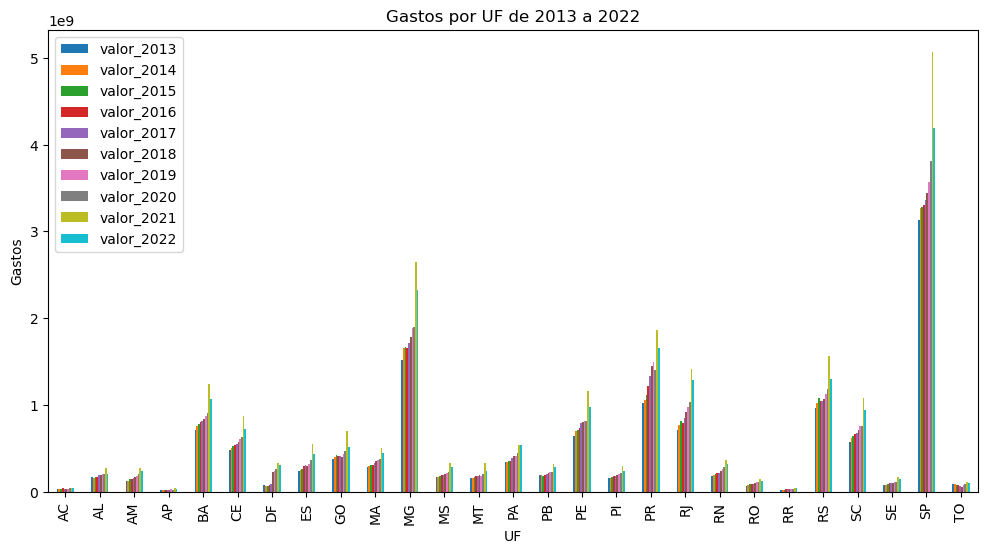

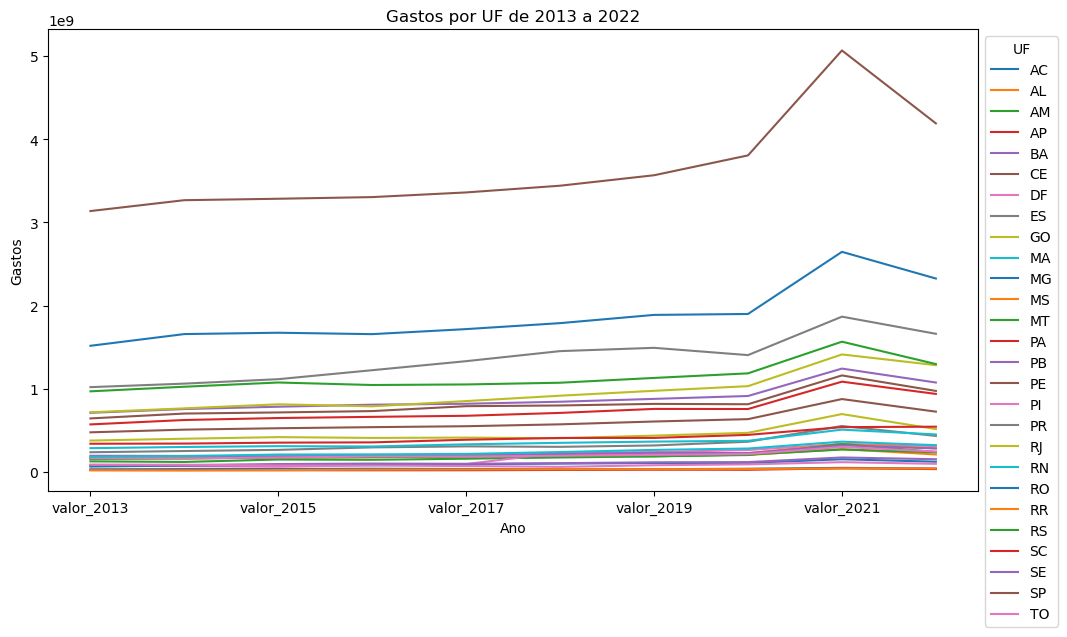

In [12]:
# Gráfico de barras
valor_por_uf.plot(kind='bar', figsize=(12, 6))
plt.title('Gastos por UF de 2013 a 2022')
plt.xlabel('UF')
plt.ylabel('Gastos')
plt.show()

# Gráfico de linhas
valor_por_uf.T.plot(figsize=(12, 6))
plt.title('Gastos por UF de 2013 a 2022')
plt.xlabel('Ano')
plt.ylabel('Gastos')
plt.legend(title='UF', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [13]:
valor_por_regiao = dados_valor.groupby('regiao')[['valor_2013', 'valor_2014', 'valor_2015', 'valor_2016', 'valor_2017', 'valor_2018', 'valor_2019', 'valor_2020', 'valor_2021', 'valor_2022']].sum()
valor_por_regiao

,valor_2013,valor_2014,valor_2015,valor_2016,valor_2017,valor_2018,valor_2019,valor_2020,valor_2021,valor_2022
regiao,,,,,,,,,,
Centro-Oeste,7.785496e+08,8.113606e+08,8.450829e+08,8.666587e+08,8.916243e+08,1.032956e+09,1.086458e+09,1.169999e+09,1.709111e+09,1.356911e+09
Nordeste,2.926065e+09,3.073250e+09,3.190978e+09,3.265072e+09,3.404029e+09,3.535150e+09,3.701739e+09,3.795538e+09,5.234641e+09,4.451427e+09
Norte,7.045907e+08,7.114360e+08,7.535184e+08,7.664885e+08,8.087566e+08,8.451205e+08,8.898891e+08,9.651769e+08,1.224762e+09,1.130223e+09
Sudeste,5.612230e+09,5.945924e+09,6.042135e+09,6.050257e+09,6.242423e+09,6.453819e+09,6.753618e+09,7.104092e+09,9.682945e+09,8.236907e+09
Sul,2.564618e+09,2.715166e+09,2.843216e+09,2.935111e+09,3.063236e+09,3.239343e+09,3.384346e+09,3.350716e+09,4.522212e+09,3.899801e+09


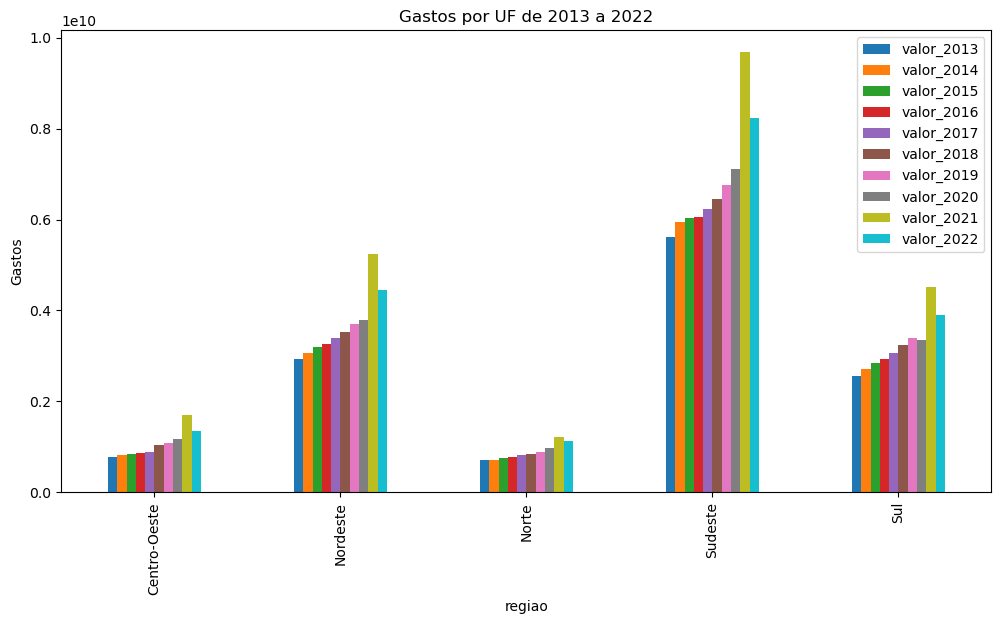

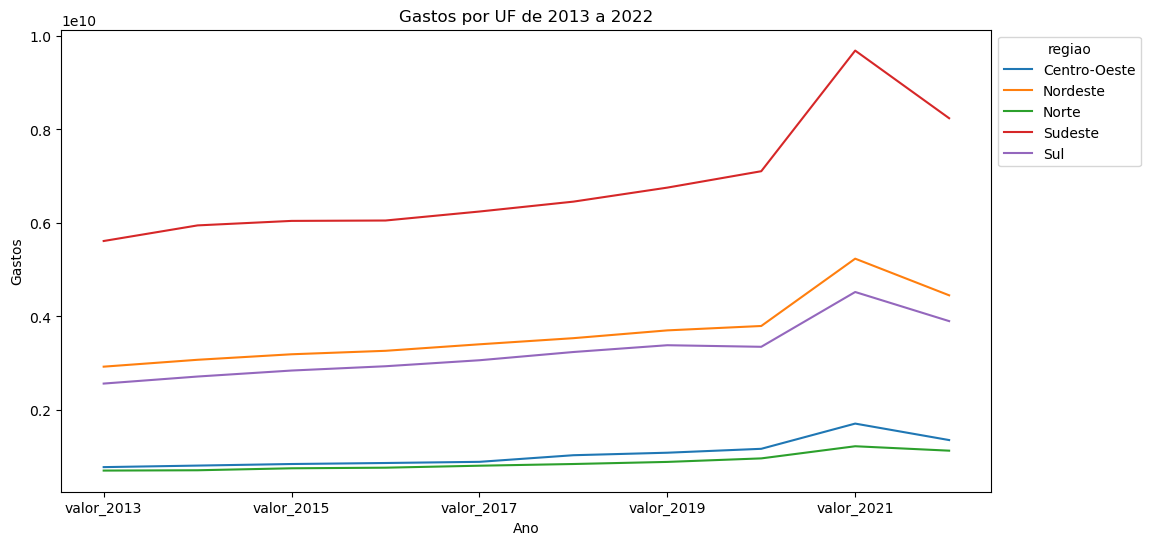

In [14]:
# Gráfico de barras
valor_por_regiao.plot(kind='bar', figsize=(12, 6))
plt.title('Gastos por UF de 2013 a 2022')
plt.xlabel('regiao')
plt.ylabel('Gastos')
plt.show()

# Gráfico de linhas
valor_por_regiao.T.plot(figsize=(12, 6))
plt.title('Gastos por UF de 2013 a 2022')
plt.xlabel('Ano')
plt.ylabel('Gastos')
plt.legend(title='regiao', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [15]:
#criando um df so com os dados de mortalidade
colunas = ['municipio', 'mortalidade_2013', 'mortalidade_2014', 'mortalidade_2015', 'mortalidade_2016', 'mortalidade_2017', 'mortalidade_2018', 'mortalidade_2019', 'mortalidade_2020', 'mortalidade_2021', 'mortalidade_2022', 'cod_ibge', 'Cod_UF', 'UF', 'regiao' ]
dados_mortalidade=dados_totais.loc[:,colunas]
dados_mortalidade

,municipio,mortalidade_2013,mortalidade_2014,mortalidade_2015,mortalidade_2016,mortalidade_2017,mortalidade_2018,mortalidade_2019,mortalidade_2020,mortalidade_2021,mortalidade_2022,cod_ibge,Cod_UF,UF,regiao
0,ALTA FLORESTA D'OESTE,0.40,0.35,0.22,0.31,0.45,0.59,0.58,1.44,2.02,1.05,110001,11,RO,Norte
1,ARIQUEMES,2.69,2.57,2.37,3.32,2.58,2.97,2.84,4.39,8.54,3.23,110002,11,RO,Norte
2,CABIXI,0.35,NaN,NaN,NaN,0.34,1.13,0.35,2.97,0.51,2.21,110003,11,RO,Norte
3,CACOAL,3.48,3.59,4.66,7.39,7.45,5.89,5.47,6.10,5.78,4.50,110004,11,RO,Norte
4,CEREJEIRAS,0.06,0.37,0.40,0.15,0.43,0.50,0.60,0.79,2.45,0.79,110005,11,RO,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590,VIANOPOLIS,NaN,1.03,0.49,2.25,1.16,1.20,0.90,1.38,0.81,1.44,522200,52,GO,Centro-Oeste
5591,VICENTINOPOLIS,0.54,NaN,0.85,NaN,1.70,1.19,0.98,3.22,3.67,2.33,522205,52,GO,Centro-Oeste
5592,VILA BOA,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,522220,52,GO,Centro-Oeste
5593,VILA PROPICIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,522230,52,GO,Centro-Oeste


In [16]:
mortalidade_por_uf = dados_mortalidade.dropna().groupby('UF')[['mortalidade_2013', 'mortalidade_2014', 'mortalidade_2015', 'mortalidade_2016', 'mortalidade_2017', 'mortalidade_2018', 'mortalidade_2019', 'mortalidade_2020', 'mortalidade_2021', 'mortalidade_2022']].mean()
mortalidade_por_uf

,mortalidade_2013,mortalidade_2014,mortalidade_2015,mortalidade_2016,mortalidade_2017,mortalidade_2018,mortalidade_2019,mortalidade_2020,mortalidade_2021,mortalidade_2022
UF,,,,,,,,,,
AC,1.026250,1.212500,1.541250,1.495000,1.638750,2.033750,1.980000,2.752500,2.680000,1.815000
AL,2.307647,2.382941,2.287647,2.117059,2.340588,2.152353,2.189412,3.092353,4.414706,3.791765
AM,0.872353,1.101176,1.246471,1.423529,1.430588,1.391765,1.511765,2.751765,3.324118,2.147059
AP,1.980000,2.163333,2.383333,2.230000,2.423333,2.616667,2.893333,5.276667,4.670000,3.320000
BA,2.462283,2.648037,3.234932,3.192237,3.468402,3.676849,3.762283,4.862009,5.526575,5.192420
CE,2.013667,2.051444,2.472000,2.869778,3.373444,3.540556,3.588556,4.501778,5.231778,4.661889
DF,3.360000,3.520000,3.240000,3.890000,3.440000,3.090000,2.900000,3.880000,4.340000,3.090000
ES,2.852973,2.933784,3.374324,3.470811,3.567838,3.578108,3.617297,4.898919,5.031892,4.178378
GO,1.900435,2.378696,2.575217,2.743913,2.837391,2.836232,3.067391,3.927681,5.750435,3.852754


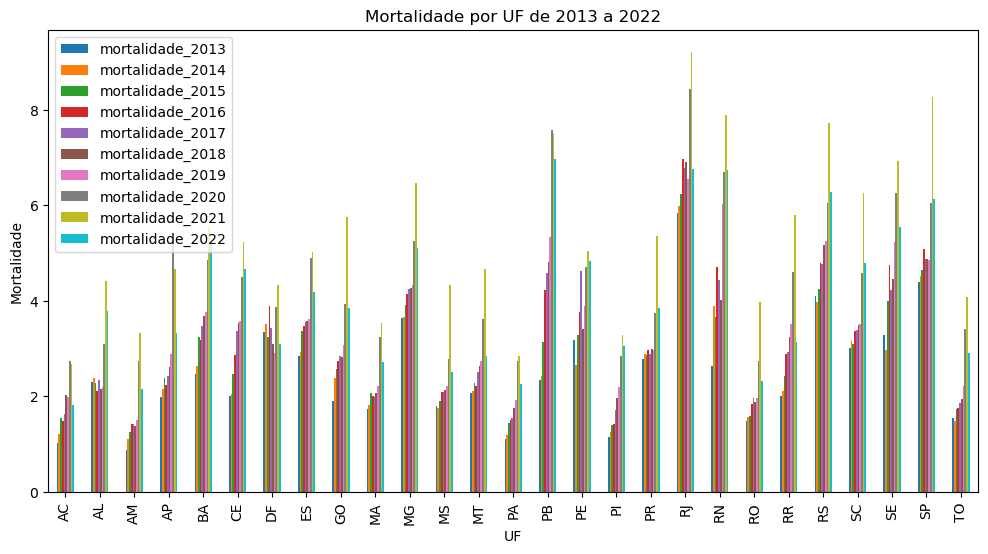

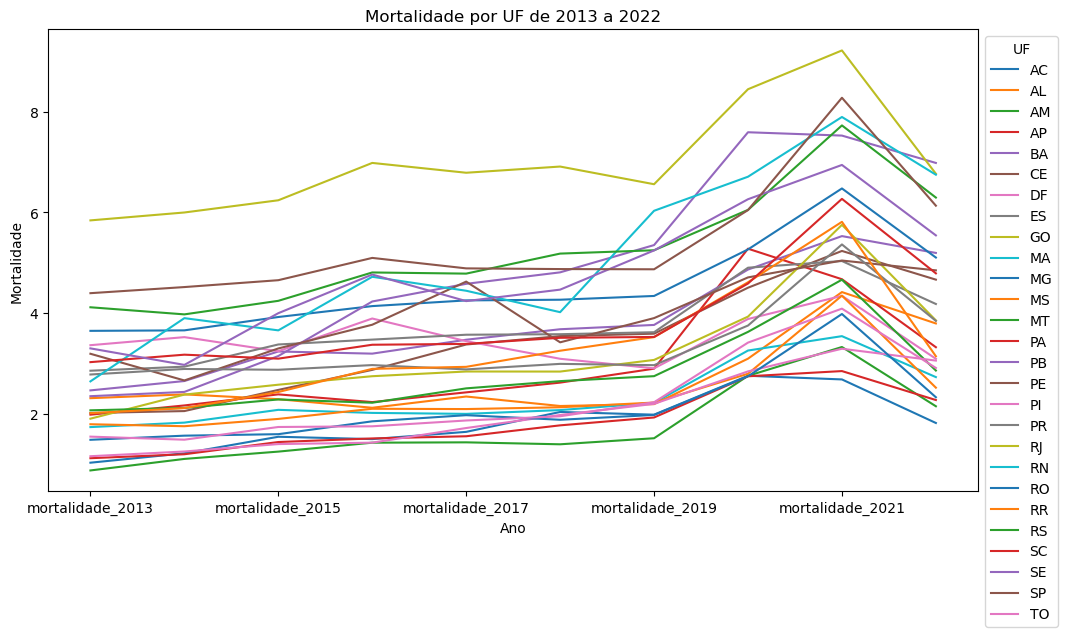

In [17]:
# Gráfico de barras
mortalidade_por_uf.plot(kind='bar', figsize=(12, 6))
plt.title('Mortalidade por UF de 2013 a 2022')
plt.xlabel('UF')
plt.ylabel('Mortalidade')
plt.show()

# Gráfico de linhas
mortalidade_por_uf.T.plot(figsize=(12, 6))
plt.title('Mortalidade por UF de 2013 a 2022')
plt.xlabel('Ano')
plt.ylabel('Mortalidade')
plt.legend(title='UF', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [18]:
mortalidade_por_regiao = dados_mortalidade.dropna().groupby('regiao')[['mortalidade_2013', 'mortalidade_2014', 'mortalidade_2015', 'mortalidade_2016', 'mortalidade_2017', 'mortalidade_2018', 'mortalidade_2019', 'mortalidade_2020', 'mortalidade_2021', 'mortalidade_2022']].mean()
mortalidade_por_regiao

,mortalidade_2013,mortalidade_2014,mortalidade_2015,mortalidade_2016,mortalidade_2017,mortalidade_2018,mortalidade_2019,mortalidade_2020,mortalidade_2021,mortalidade_2022
regiao,,,,,,,,,,
Centro-Oeste,1.923598,2.127622,2.298232,2.413902,2.528841,2.576890,2.728110,3.510122,5.024512,3.177622
Nordeste,2.384961,2.485895,2.950253,3.180759,3.508307,3.469397,3.754377,4.779533,5.395564,4.924689
Norte,1.211638,1.307414,1.508103,1.608017,1.677759,1.804310,1.948621,2.900948,3.301897,2.336379
Sudeste,4.133641,4.207636,4.426386,4.782826,4.732024,4.745190,4.742731,5.885231,7.417649,5.645856
Sul,3.418152,3.429877,3.520370,3.864312,3.832567,4.069589,4.094661,4.960164,6.618296,5.147084


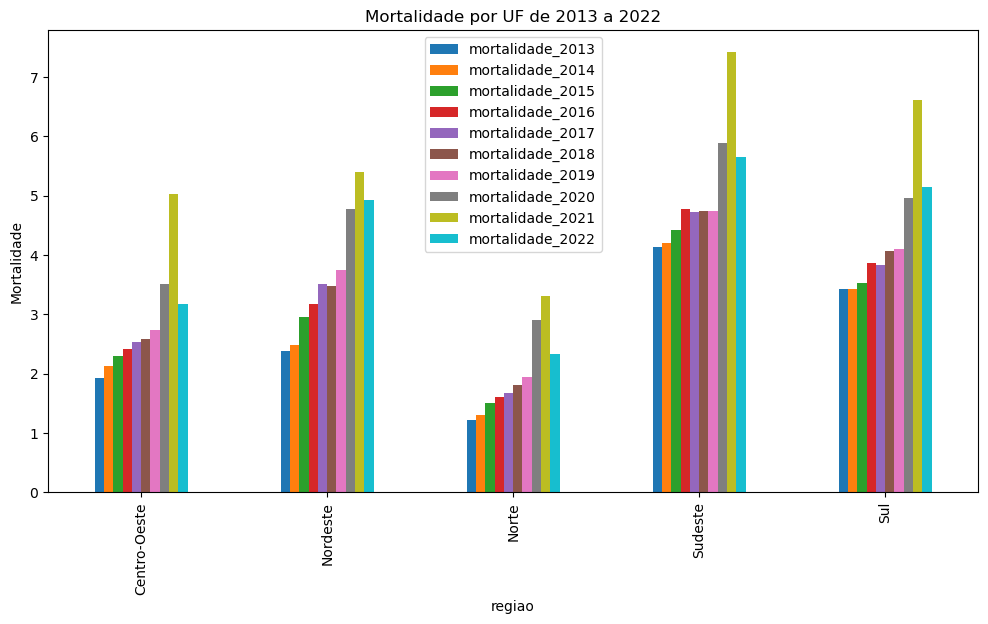

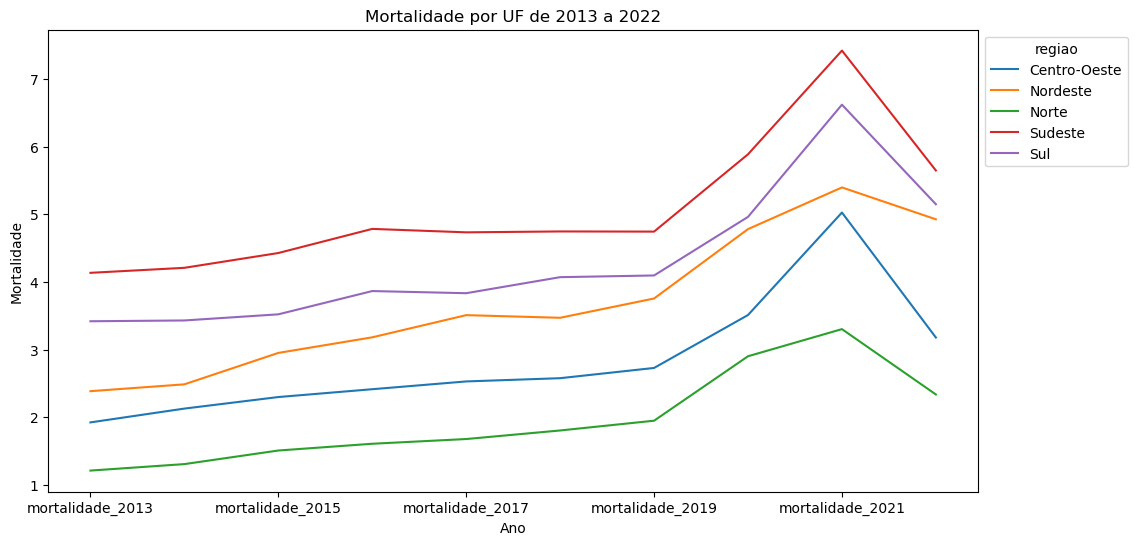

In [19]:
# Gráfico de barras
mortalidade_por_regiao.plot(kind='bar', figsize=(12, 6))
plt.title('Mortalidade por UF de 2013 a 2022')
plt.xlabel('regiao')
plt.ylabel('Mortalidade')
plt.show()

# Gráfico de linhas
mortalidade_por_regiao.T.plot(figsize=(12, 6))
plt.title('Mortalidade por UF de 2013 a 2022')
plt.xlabel('Ano')
plt.ylabel('Mortalidade')
plt.legend(title='regiao', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [20]:
for coluna in dados_totais.columns:
    print(coluna)

municipio
valor_2013
valor_2014
valor_2015
valor_2016
valor_2017
valor_2018
valor_2019
valor_2020
valor_2021
valor_2022
valor_Total
valor2_2013
valor2_2014
valor2_2015
valor2_2016
valor2_2017
valor2_2018
valor2_2019
valor2_2020
valor2_2021
valor2_2022
valor2_Total
valor3_2013
valor3_2014
valor3_2015
valor3_2016
valor3_2017
valor3_2018
valor3_2019
valor3_2020
valor3_2021
valor3_2022
valor3_Total
valor4_2013
valor4_2014
valor4_2015
valor4_2016
valor4_2017
valor4_2018
valor4_2019
valor4_2020
valor4_2021
valor4_2022
valor4_Total
valor5_2013
valor5_2014
valor5_2015
valor5_2016
valor5_2017
valor5_2018
valor5_2019
valor5_2020
valor5_2021
valor5_2022
valor5_Total
AIH_2013
AIH_2014
AIH_2015
AIH_2016
AIH_2017
AIH_2018
AIH_2019
AIH_2020
AIH_2021
AIH_2022
AIH_Total
AIH1_2013
AIH1_2014
AIH1_2015
AIH1_2016
AIH1_2017
AIH1_2018
AIH1_2019
AIH1_2020
AIH1_2021
AIH1_2022
AIH1_Total
AIH2_2013
AIH2_2014
AIH2_2015
AIH2_2016
AIH2_2017
AIH2_2018
AIH2_2019
AIH2_2020
AIH2_2021
AIH2_2022
AIH2_Total
AIH3_2013
AIH3

In [21]:
#criando um df so com os dados de AIH
colunas = ['municipio', 'AIH_2013', 'AIH_2014', 'AIH_2015', 'AIH_2016', 'AIH_2017', 'AIH_2018', 'AIH_2019', 'AIH_2020', 'AIH_2021', 'AIH_2022', 'cod_ibge', 'Cod_UF', 'UF', 'regiao' ]
dados_AIH=dados_totais.loc[:,colunas]
dados_AIH

,municipio,AIH_2013,AIH_2014,AIH_2015,AIH_2016,AIH_2017,AIH_2018,AIH_2019,AIH_2020,AIH_2021,AIH_2022,cod_ibge,Cod_UF,UF,regiao
0,ALTA FLORESTA D'OESTE,2247.0,2296.0,2270.0,1938.0,1987.0,2046.0,2230.0,1247.0,1385.0,1913.0,110001,11,RO,Norte
1,ARIQUEMES,5505.0,5251.0,5790.0,6152.0,6364.0,5766.0,6055.0,5858.0,7575.0,7007.0,110002,11,RO,Norte
2,CABIXI,287.0,282.0,300.0,304.0,291.0,266.0,285.0,236.0,195.0,181.0,110003,11,RO,Norte
3,CACOAL,10187.0,10793.0,10174.0,11740.0,12314.0,13571.0,13272.0,9829.0,10506.0,12836.0,110004,11,RO,Norte
4,CEREJEIRAS,1547.0,1368.0,1482.0,1318.0,1161.0,1200.0,999.0,756.0,777.0,1013.0,110005,11,RO,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590,VIANOPOLIS,1260.0,1165.0,1028.0,978.0,951.0,1079.0,1004.0,872.0,989.0,975.0,522200,52,GO,Centro-Oeste
5591,VICENTINOPOLIS,184.0,180.0,117.0,101.0,176.0,252.0,307.0,311.0,245.0,258.0,522205,52,GO,Centro-Oeste
5592,VILA BOA,139.0,35.0,31.0,39.0,67.0,NaN,NaN,NaN,NaN,NaN,522220,52,GO,Centro-Oeste
5593,VILA PROPICIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,522230,52,GO,Centro-Oeste


In [22]:
AIH_por_uf = dados_AIH.dropna().groupby('UF')[['AIH_2013', 'AIH_2014', 'AIH_2015', 'AIH_2016', 'AIH_2017', 'AIH_2018', 'AIH_2019', 'AIH_2020', 'AIH_2021', 'AIH_2022']].sum()
AIH_por_uf

,AIH_2013,AIH_2014,AIH_2015,AIH_2016,AIH_2017,AIH_2018,AIH_2019,AIH_2020,AIH_2021,AIH_2022
UF,,,,,,,,,,
AC,51564.0,52679.0,49130.0,48169.0,43876.0,44441.0,44424.0,42842.0,48376.0,48806.0
AL,173671.0,163410.0,172387.0,174613.0,176729.0,175823.0,175479.0,148971.0,163239.0,159878.0
AM,163037.0,148620.0,165941.0,164478.0,171684.0,180094.0,190070.0,172445.0,200935.0,197721.0
AP,37280.0,35463.0,34537.0,32561.0,32465.0,36518.0,38877.0,30210.0,37317.0,39099.0
BA,798469.0,811293.0,819800.0,791223.0,791377.0,814311.0,830503.0,691378.0,744532.0,812803.0
CE,469032.0,483691.0,483938.0,475353.0,473091.0,502663.0,528851.0,455110.0,508568.0,526214.0
DF,63677.0,58027.0,61021.0,70995.0,84919.0,212227.0,230592.0,213478.0,230888.0,232063.0
ES,212637.0,221972.0,227027.0,231373.0,239773.0,242543.0,245704.0,221846.0,260566.0,259654.0
GO,348527.0,349212.0,351284.0,330735.0,332775.0,329118.0,345114.0,306185.0,333637.0,360518.0


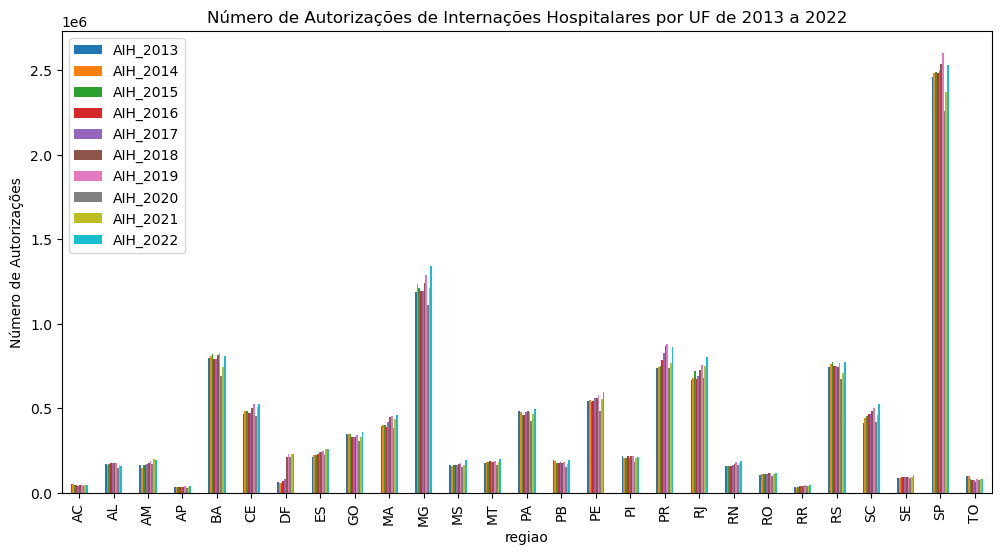

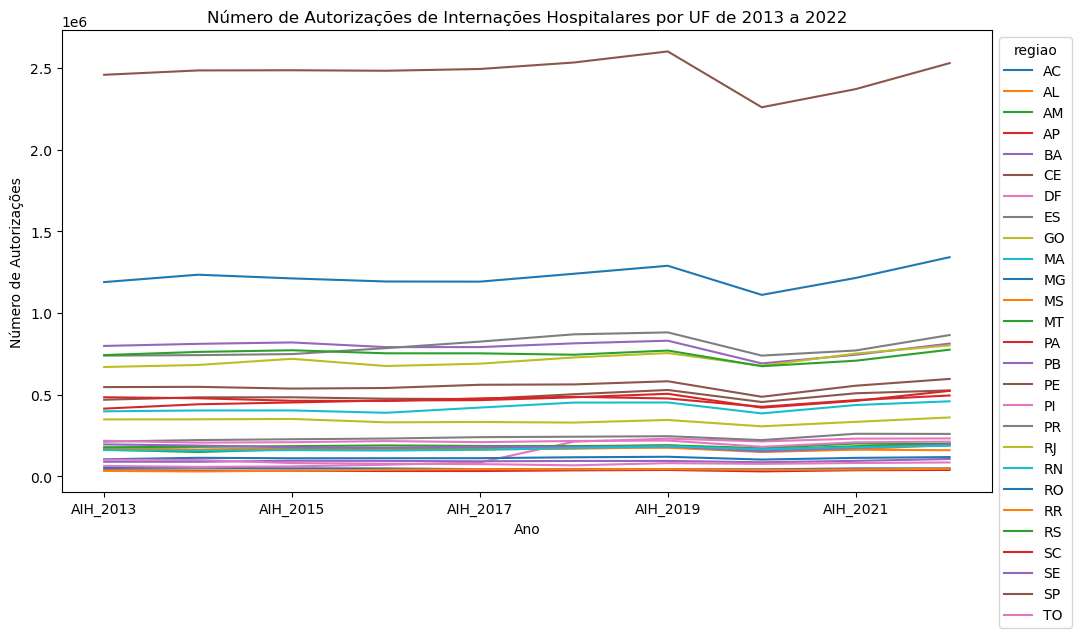

In [23]:
# Gráfico de barras
AIH_por_uf.plot(kind='bar', figsize=(12, 6))
plt.title('Número de Autorizações de Internações Hospitalares por UF de 2013 a 2022')
plt.xlabel('regiao')
plt.ylabel('Número de Autorizações')
plt.show()

# Gráfico de linhas
AIH_por_uf.T.plot(figsize=(12, 6))
plt.title('Número de Autorizações de Internações Hospitalares por UF de 2013 a 2022')
plt.xlabel('Ano')
plt.ylabel('Número de Autorizações')
plt.legend(title='regiao', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [24]:
AIH_por_regiao = dados_AIH.dropna().groupby('regiao')[['AIH_2013', 'AIH_2014', 'AIH_2015', 'AIH_2016', 'AIH_2017', 'AIH_2018', 'AIH_2019', 'AIH_2020', 'AIH_2021', 'AIH_2022']].sum()
AIH_por_regiao

,AIH_2013,AIH_2014,AIH_2015,AIH_2016,AIH_2017,AIH_2018,AIH_2019,AIH_2020,AIH_2021,AIH_2022
regiao,,,,,,,,,,
Centro-Oeste,755824.0,749882.0,762014.0,754858.0,768611.0,895601.0,943338.0,838284.0,914279.0,986860.0
Nordeste,3049064.0,3051051.0,3059371.0,3014141.0,3068587.0,3170590.0,3250421.0,2753229.0,3062908.0,3253202.0
Norte,976013.0,957938.0,938474.0,934569.0,954559.0,975307.0,994696.0,889289.0,989577.0,1029967.0
Sudeste,4530348.0,4624004.0,4645034.0,4583474.0,4615979.0,4744826.0,4891422.0,4270376.0,4598130.0,4933742.0
Sul,1896494.0,1945103.0,1972799.0,2002684.0,2044573.0,2098000.0,2156901.0,1834139.0,1940490.0,2164025.0


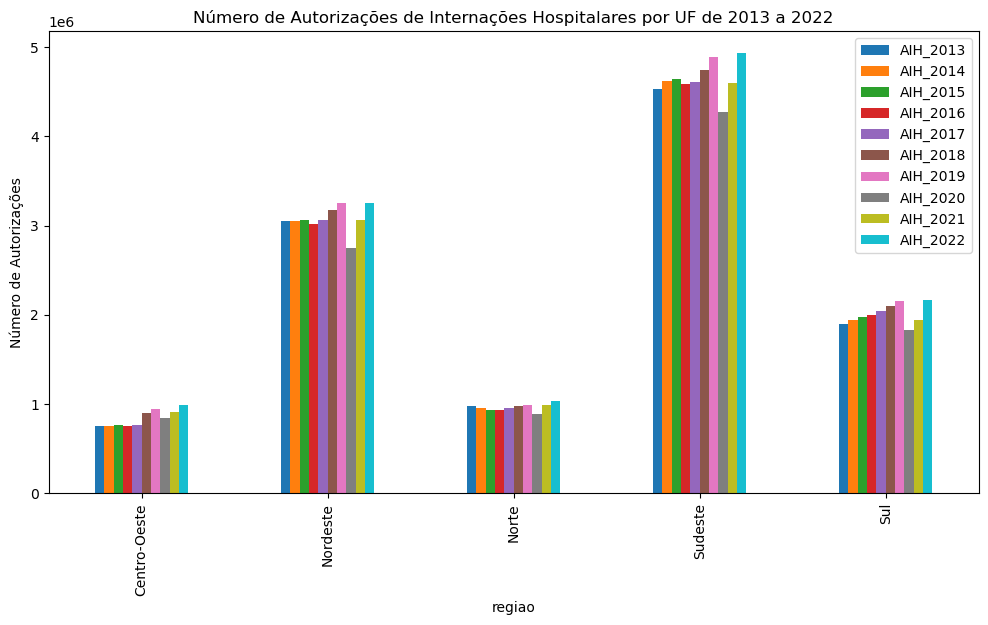

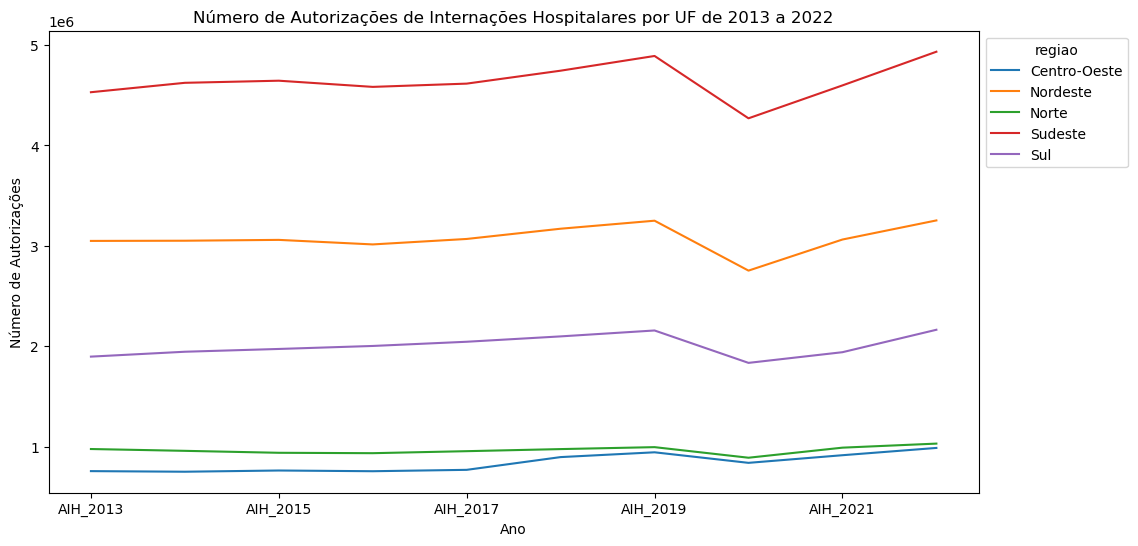

In [25]:
# Gráfico de barras
AIH_por_regiao.plot(kind='bar', figsize=(12, 6))
plt.title('Número de Autorizações de Internações Hospitalares por UF de 2013 a 2022')
plt.xlabel('regiao')
plt.ylabel('Número de Autorizações')
plt.show()

# Gráfico de linhas
AIH_por_regiao.T.plot(figsize=(12, 6))
plt.title('Número de Autorizações de Internações Hospitalares por UF de 2013 a 2022')
plt.xlabel('Ano')
plt.ylabel('Número de Autorizações')
plt.legend(title='regiao', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [26]:
#criando um df so com os dados de AIH do grupo 1 
colunas = ['municipio', 'AIH1_2013', 'AIH1_2014', 'AIH1_2015', 'AIH1_2016', 'AIH1_2017', 'AIH1_2018', 'AIH1_2019', 'AIH1_2020', 'AIH1_2021', 'AIH1_2022', 'cod_ibge', 'Cod_UF', 'UF', 'regiao' ]
dados_AIH1=dados_totais.loc[:,colunas]
dados_AIH1

,municipio,AIH1_2013,AIH1_2014,AIH1_2015,AIH1_2016,AIH1_2017,AIH1_2018,AIH1_2019,AIH1_2020,AIH1_2021,AIH1_2022,cod_ibge,Cod_UF,UF,regiao
0,ALTA FLORESTA D'OESTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110001,11,RO,Norte
1,ARIQUEMES,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,110002,11,RO,Norte
2,CABIXI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110003,11,RO,Norte
3,CACOAL,2.0,1.0,3.0,3.0,6.0,11.0,10.0,10.0,1.0,9.0,110004,11,RO,Norte
4,CEREJEIRAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110005,11,RO,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590,VIANOPOLIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,522200,52,GO,Centro-Oeste
5591,VICENTINOPOLIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,522205,52,GO,Centro-Oeste
5592,VILA BOA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,522220,52,GO,Centro-Oeste
5593,VILA PROPICIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,522230,52,GO,Centro-Oeste


In [27]:
AIH1_por_regiao = dados_AIH1.dropna().groupby('regiao')[['AIH1_2013', 'AIH1_2014', 'AIH1_2015', 'AIH1_2016', 'AIH1_2017', 'AIH1_2018', 'AIH1_2019', 'AIH1_2020', 'AIH1_2021', 'AIH1_2022']].sum()
AIH1_por_regiao

,AIH1_2013,AIH1_2014,AIH1_2015,AIH1_2016,AIH1_2017,AIH1_2018,AIH1_2019,AIH1_2020,AIH1_2021,AIH1_2022
regiao,,,,,,,,,,
Centro-Oeste,1086.0,1018.0,801.0,801.0,843.0,1184.0,1385.0,846.0,1029.0,1060.0
Nordeste,2788.0,2731.0,2630.0,2363.0,2706.0,2933.0,3429.0,2405.0,3089.0,3771.0
Norte,277.0,302.0,372.0,440.0,404.0,467.0,541.0,363.0,616.0,643.0
Sudeste,9553.0,10624.0,11607.0,12170.0,11741.0,12784.0,13262.0,9417.0,9942.0,11610.0
Sul,4550.0,4830.0,6337.0,7058.0,7567.0,8395.0,8733.0,6037.0,7279.0,8159.0


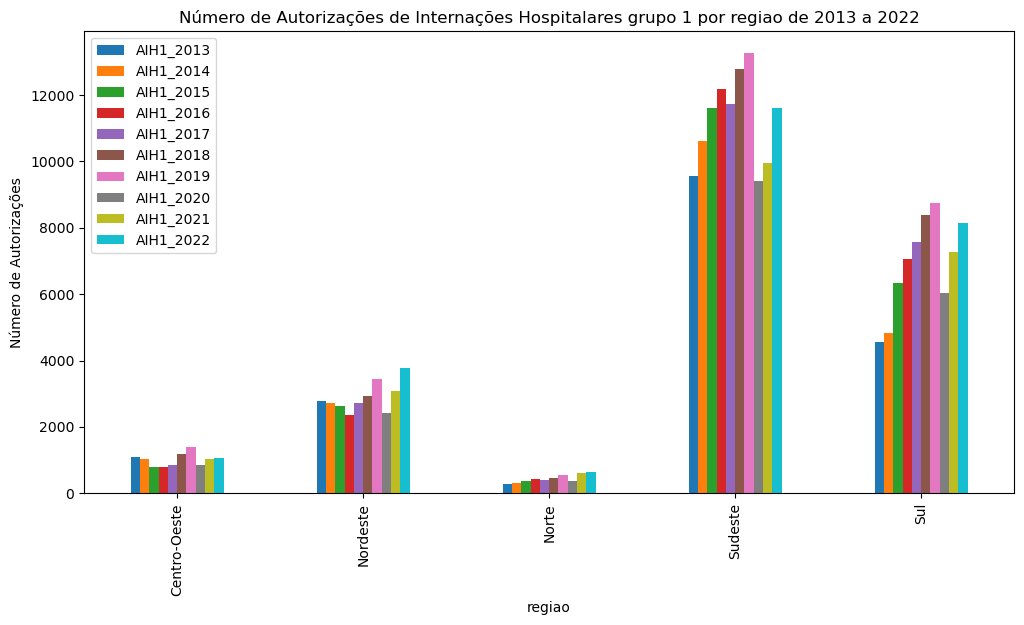

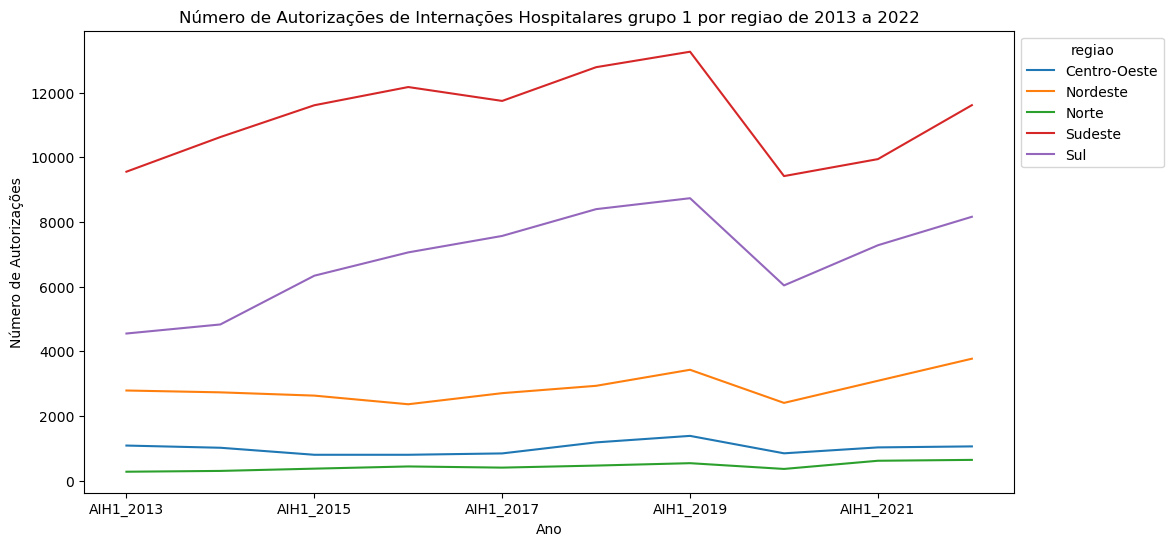

In [28]:
# Gráfico de barras
AIH1_por_regiao.plot(kind='bar', figsize=(12, 6))
plt.title('Número de Autorizações de Internações Hospitalares grupo 1 por regiao de 2013 a 2022')
plt.xlabel('regiao')
plt.ylabel('Número de Autorizações')
plt.show()

# Gráfico de linhas
AIH1_por_regiao.T.plot(figsize=(12, 6))
plt.title('Número de Autorizações de Internações Hospitalares grupo 1 por regiao de 2013 a 2022')
plt.xlabel('Ano')
plt.ylabel('Número de Autorizações')
plt.legend(title='regiao', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

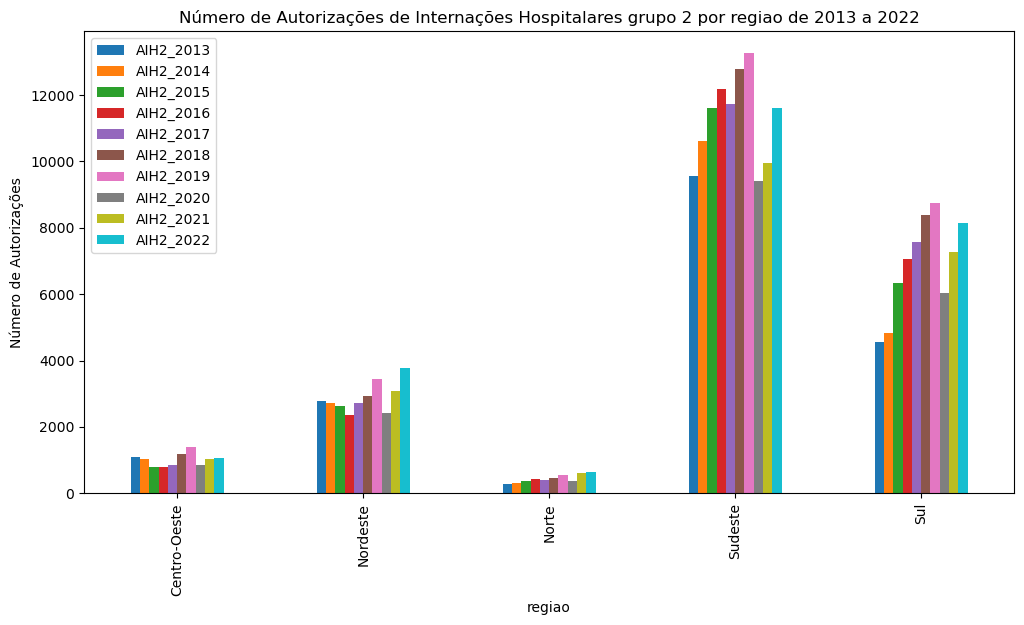

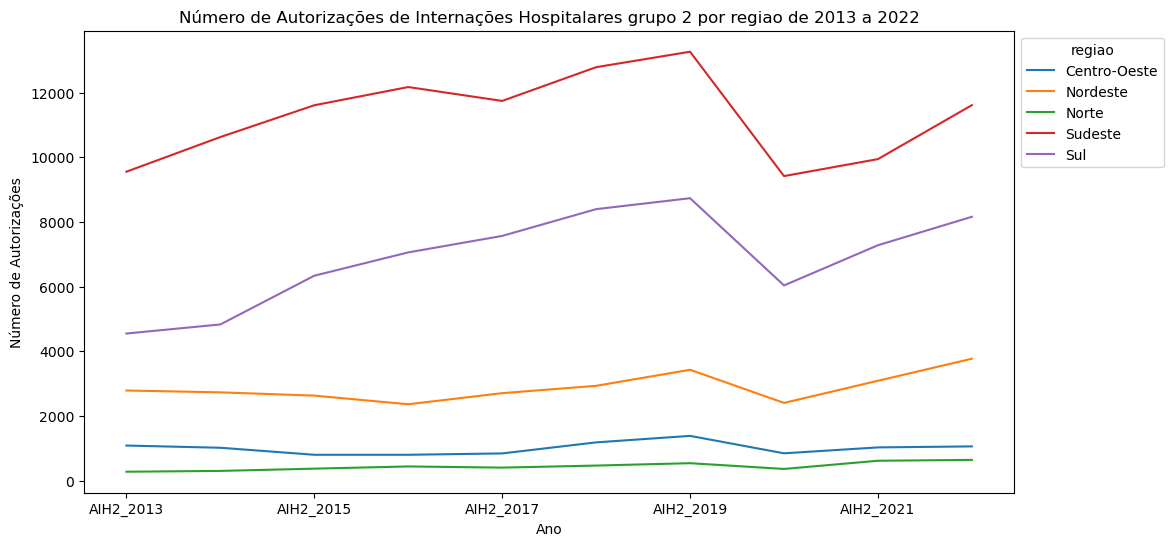

In [29]:
#criando um df so com os dados de AIH do grupo 1 
colunas = ['municipio', 'AIH2_2013', 'AIH2_2014', 'AIH2_2015', 'AIH2_2016', 'AIH2_2017', 'AIH2_2018', 'AIH2_2019', 'AIH2_2020', 'AIH2_2021', 'AIH2_2022', 'cod_ibge', 'Cod_UF', 'UF', 'regiao' ]
dados_AIH2=dados_totais.loc[:,colunas]


dados_AIH2 = dados_AIH2.dropna().groupby('regiao')[['AIH2_2013', 'AIH2_2014', 'AIH2_2015', 'AIH2_2016', 'AIH2_2017', 'AIH2_2018', 'AIH2_2019', 'AIH2_2020', 'AIH2_2021', 'AIH2_2022']].sum()


# Gráfico de barras
dados_AIH2.plot(kind='bar', figsize=(12, 6))
plt.title('Número de Autorizações de Internações Hospitalares grupo 2 por regiao de 2013 a 2022')
plt.xlabel('regiao')
plt.ylabel('Número de Autorizações')
plt.show()

# Gráfico de linhas
dados_AIH2.T.plot(figsize=(12, 6))
plt.title('Número de Autorizações de Internações Hospitalares grupo 2 por regiao de 2013 a 2022')
plt.xlabel('Ano')
plt.ylabel('Número de Autorizações')
plt.legend(title='regiao', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

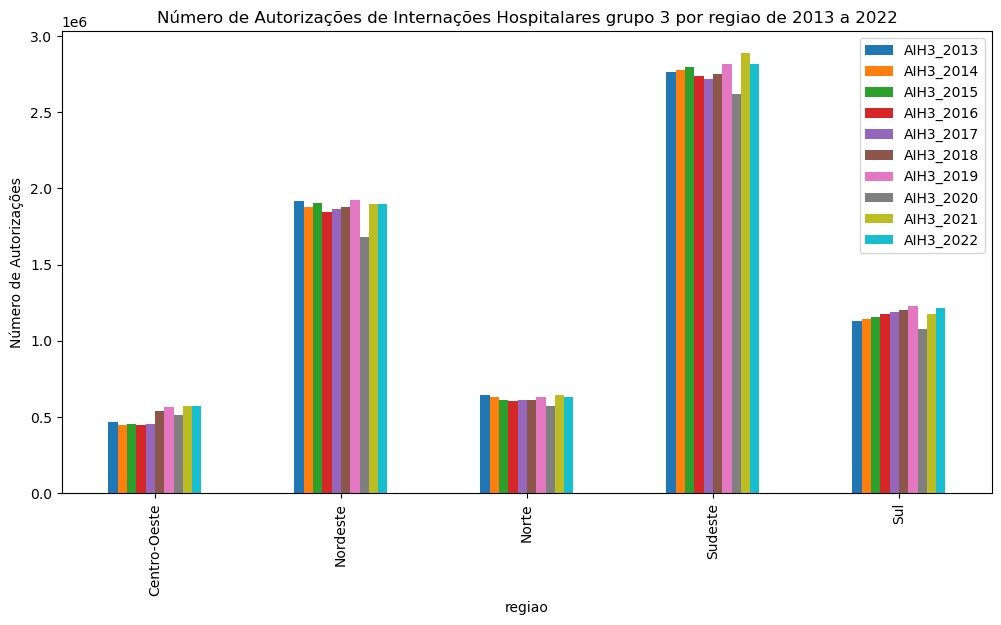

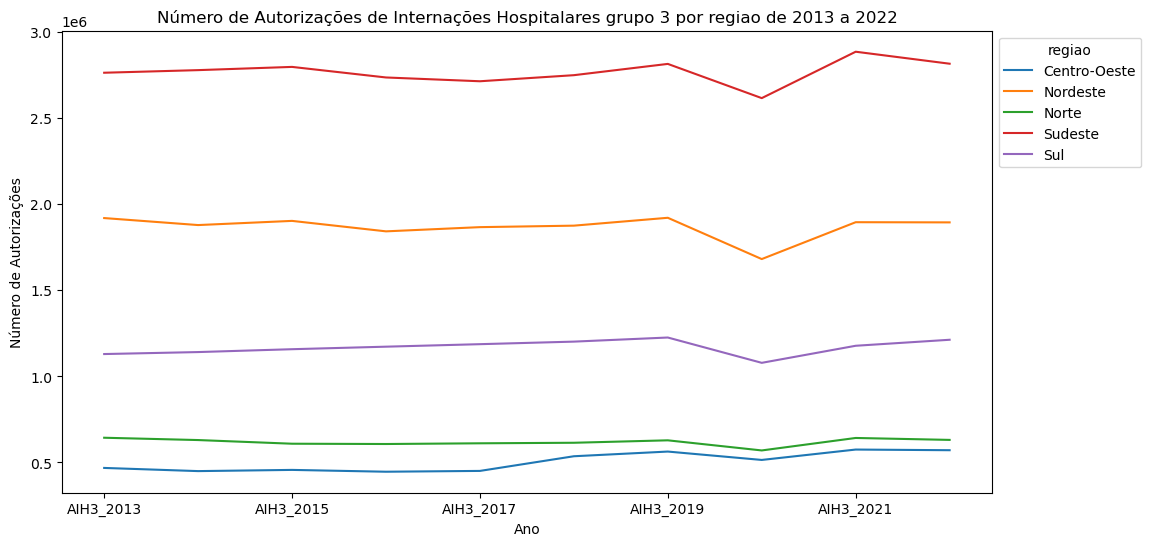

In [30]:
colunas = ['municipio', 'AIH3_2013', 'AIH3_2014', 'AIH3_2015', 'AIH3_2016', 'AIH3_2017', 'AIH3_2018', 'AIH3_2019', 'AIH3_2020', 'AIH3_2021', 'AIH3_2022', 'cod_ibge', 'Cod_UF', 'UF', 'regiao' ]
dados_AIH3=dados_totais.loc[:,colunas]


dados_AIH3 = dados_AIH3.dropna().groupby('regiao')[['AIH3_2013', 'AIH3_2014', 'AIH3_2015', 'AIH3_2016', 'AIH3_2017', 'AIH3_2018', 'AIH3_2019', 'AIH3_2020', 'AIH3_2021', 'AIH3_2022']].sum()


# Gráfico de barras
dados_AIH3.plot(kind='bar', figsize=(12, 6))
plt.title('Número de Autorizações de Internações Hospitalares grupo 3 por regiao de 2013 a 2022')
plt.xlabel('regiao')
plt.ylabel('Número de Autorizações')
plt.show()

# Gráfico de linhas
dados_AIH3.T.plot(figsize=(12, 6))
plt.title('Número de Autorizações de Internações Hospitalares grupo 3 por regiao de 2013 a 2022')
plt.xlabel('Ano')
plt.ylabel('Número de Autorizações')
plt.legend(title='regiao', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

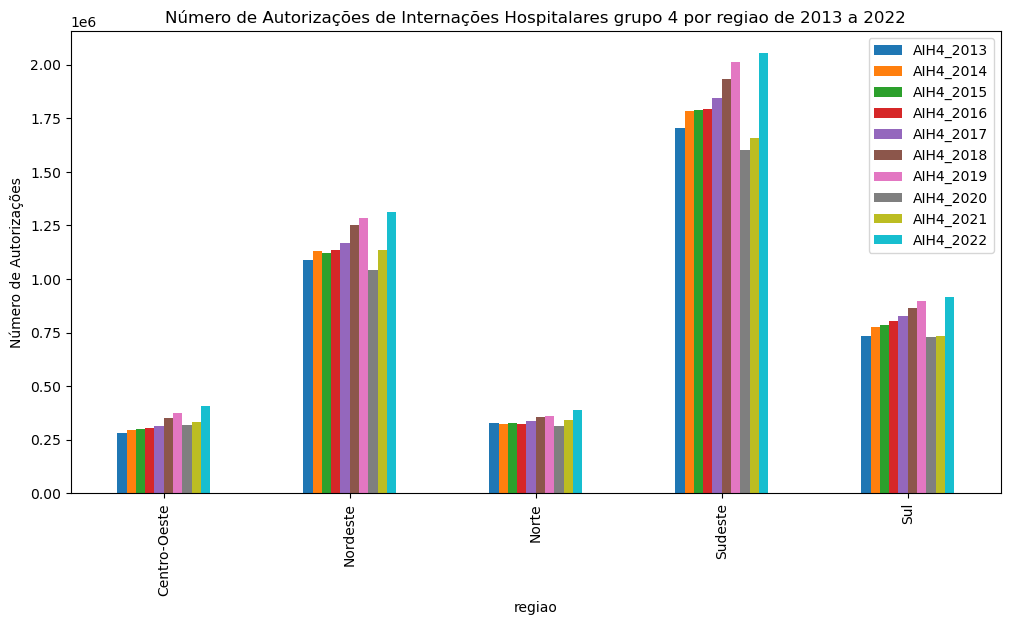

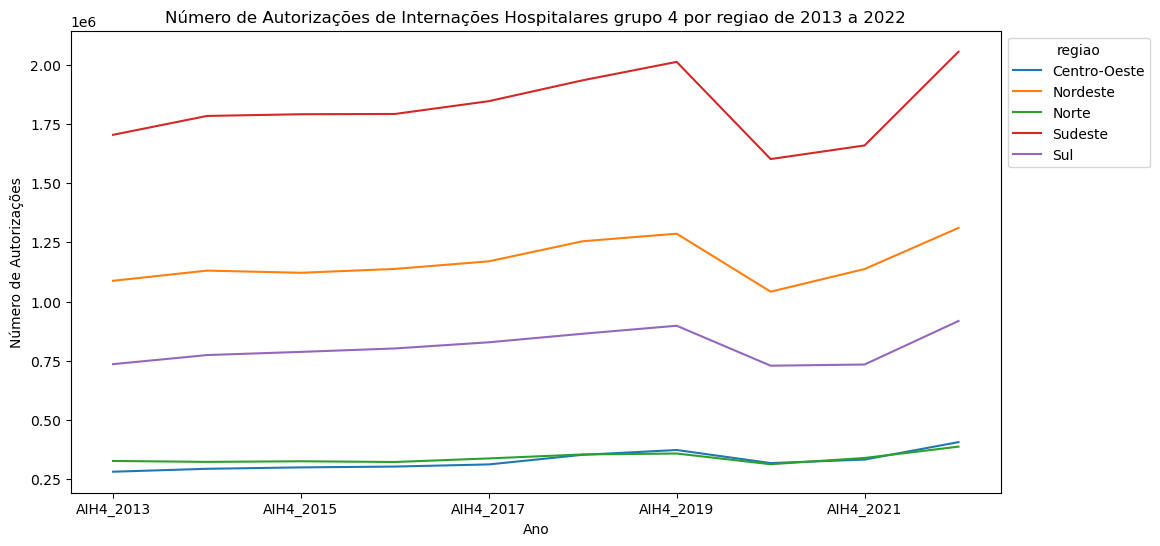

In [31]:
colunas = ['municipio', 'AIH4_2013', 'AIH4_2014', 'AIH4_2015', 'AIH4_2016', 'AIH4_2017', 'AIH4_2018', 'AIH4_2019', 'AIH4_2020', 'AIH4_2021', 'AIH4_2022', 'cod_ibge', 'Cod_UF', 'UF', 'regiao' ]
dados_AIH4=dados_totais.loc[:,colunas]


dados_AIH4 = dados_AIH4.dropna().groupby('regiao')[['AIH4_2013', 'AIH4_2014', 'AIH4_2015', 'AIH4_2016', 'AIH4_2017', 'AIH4_2018', 'AIH4_2019', 'AIH4_2020', 'AIH4_2021', 'AIH4_2022']].sum()


# Gráfico de barras
dados_AIH4.plot(kind='bar', figsize=(12, 6))
plt.title('Número de Autorizações de Internações Hospitalares grupo 4 por regiao de 2013 a 2022')
plt.xlabel('regiao')
plt.ylabel('Número de Autorizações')
plt.show()

# Gráfico de linhas
dados_AIH4.T.plot(figsize=(12, 6))
plt.title('Número de Autorizações de Internações Hospitalares grupo 4 por regiao de 2013 a 2022')
plt.xlabel('Ano')
plt.ylabel('Número de Autorizações')
plt.legend(title='regiao', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

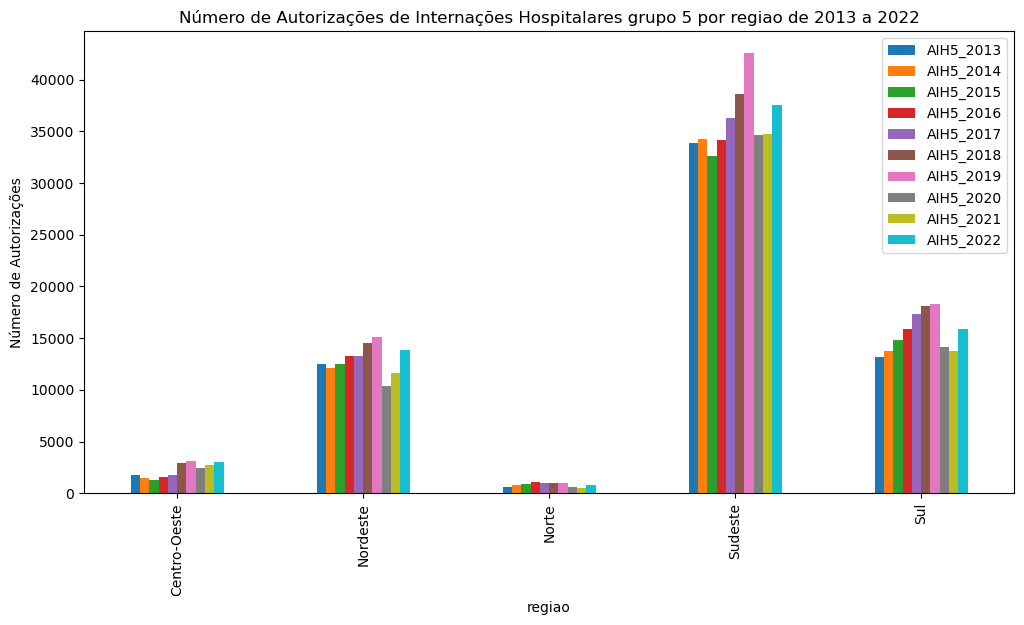

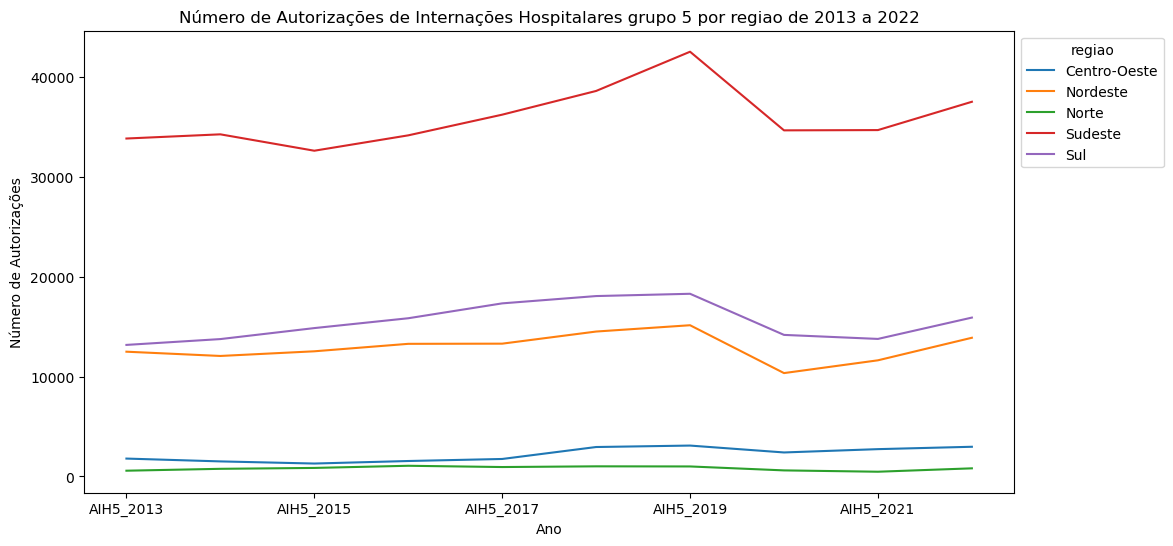

In [32]:
colunas = ['municipio', 'AIH5_2013', 'AIH5_2014', 'AIH5_2015', 'AIH5_2016', 'AIH5_2017', 'AIH5_2018', 'AIH5_2019', 'AIH5_2020', 'AIH5_2021', 'AIH5_2022', 'cod_ibge', 'Cod_UF', 'UF', 'regiao' ]
dados_AIH5=dados_totais.loc[:,colunas]


dados_AIH5 = dados_AIH5.dropna().groupby('regiao')[['AIH5_2013', 'AIH5_2014', 'AIH5_2015', 'AIH5_2016', 'AIH5_2017', 'AIH5_2018', 'AIH5_2019', 'AIH5_2020', 'AIH5_2021', 'AIH5_2022']].sum()


# Gráfico de barras
dados_AIH5.plot(kind='bar', figsize=(12, 6))
plt.title('Número de Autorizações de Internações Hospitalares grupo 5 por regiao de 2013 a 2022')
plt.xlabel('regiao')
plt.ylabel('Número de Autorizações')
plt.show()

# Gráfico de linhas
dados_AIH5.T.plot(figsize=(12, 6))
plt.title('Número de Autorizações de Internações Hospitalares grupo 5 por regiao de 2013 a 2022')
plt.xlabel('Ano')
plt.ylabel('Número de Autorizações')
plt.legend(title='regiao', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [33]:
anos = range(2013, 2023)
for ano in anos:
    dados_totais.loc[:, f'Valor_AIH_{ano}'] = dados_totais[f'valor_{ano}'] / dados_totais[f'AIH_{ano}']
dados_totais

C:\Users\Rosana\AppData\Local\Temp\ipykernel_14056\79450891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_totais.loc[:, f'Valor_AIH_{ano}'] = dados_totais[f'valor_{ano}'] / dados_totais[f'AIH_{ano}']
C:\Users\Rosana\AppData\Local\Temp\ipykernel_14056\79450891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_totais.loc[:, f'Valor_AIH_{ano}'] = dados_totais[f'valor_{ano}'] / dados_totais[f'AIH_{ano}']
C:\Users\Rosana\AppData\Local\Temp\ipykernel_14056\79450891.py:3: SettingWithCopyWarning

,municipio,valor_2013,valor_2014,valor_2015,valor_2016,valor_2017,valor_2018,valor_2019,valor_2020,valor_2021,...,Valor_AIH_2013,Valor_AIH_2014,Valor_AIH_2015,Valor_AIH_2016,Valor_AIH_2017,Valor_AIH_2018,Valor_AIH_2019,Valor_AIH_2020,Valor_AIH_2021,Valor_AIH_2022
0,ALTA FLORESTA D'OESTE,725487.04,760888.27,724116.20,626269.75,626343.21,6.536694e+05,6.961739e+05,4.803190e+05,6.682437e+05,...,322.869177,331.397330,318.993921,323.152606,315.220539,319.486505,312.185614,385.179671,482.486404,302.171537
1,ARIQUEMES,3708151.19,3463928.54,3973057.43,4382048.70,4502478.44,4.342874e+06,4.548937e+06,7.196513e+06,1.478188e+07,...,673.596946,659.670261,686.192993,712.296603,707.491898,753.186563,751.269483,1228.493177,1951.403117,962.263127
2,CABIXI,89864.83,89403.87,92187.84,100223.63,97387.75,8.062843e+04,8.619075e+04,7.649719e+04,1.449199e+05,...,313.117875,317.035000,307.292800,329.682993,334.665808,303.114398,302.423684,324.140636,743.178718,373.341823
3,CACOAL,5081347.01,7392914.64,7533927.08,9580907.92,10054183.76,1.124636e+07,1.160320e+07,8.557085e+06,1.115655e+07,...,498.807010,684.973097,740.507871,816.090964,816.483982,828.705683,874.261729,870.595648,1061.921935,871.714353
4,CEREJEIRAS,522643.32,491123.65,565965.05,483308.62,446184.84,4.601988e+05,3.538571e+05,2.869115e+05,4.746083e+05,...,337.843129,359.008516,381.892746,366.698498,384.310801,383.498983,354.211291,379.512553,610.821544,429.923860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590,VIANOPOLIS,423968.57,394169.84,324303.99,284435.18,288963.32,3.314020e+05,2.995028e+05,2.739463e+05,4.186292e+05,...,336.482992,338.343210,315.470807,290.833517,303.852072,307.138044,298.309572,314.158555,423.285369,293.295559
5591,VICENTINOPOLIS,64744.19,65571.74,44772.18,39252.53,76204.07,1.041283e+05,1.272859e+05,1.406667e+05,1.568381e+05,...,351.870598,364.287444,382.668205,388.638911,432.977670,413.207698,414.612052,452.304469,640.155551,470.023915
5592,VILA BOA,51512.08,13115.73,9375.07,11457.24,24336.97,NaN,NaN,NaN,NaN,...,370.590504,374.735143,302.421613,293.775385,363.238358,NaN,NaN,NaN,NaN,NaN
5593,VILA PROPICIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


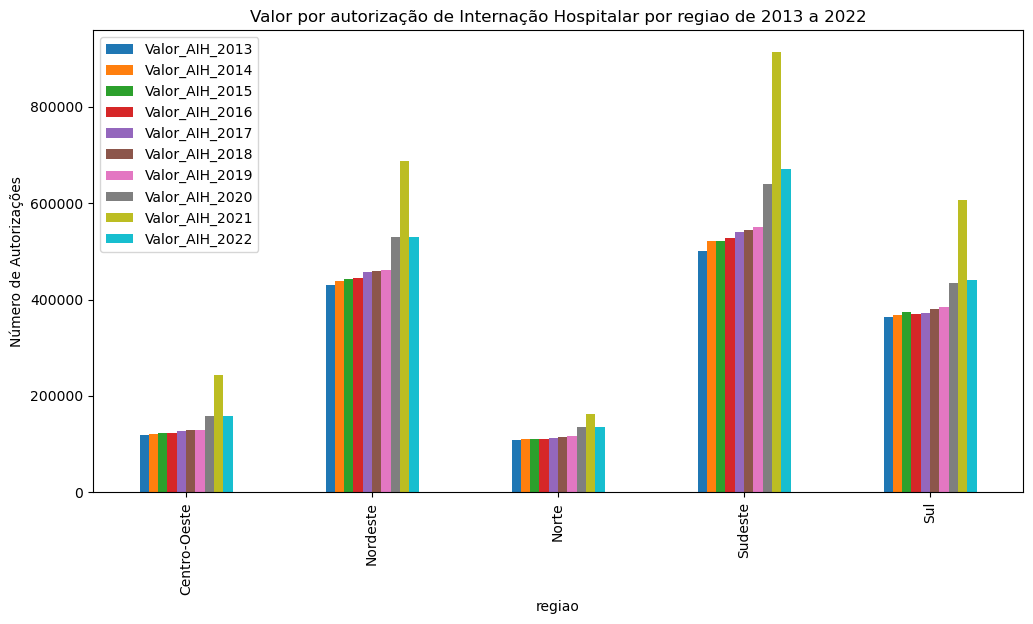

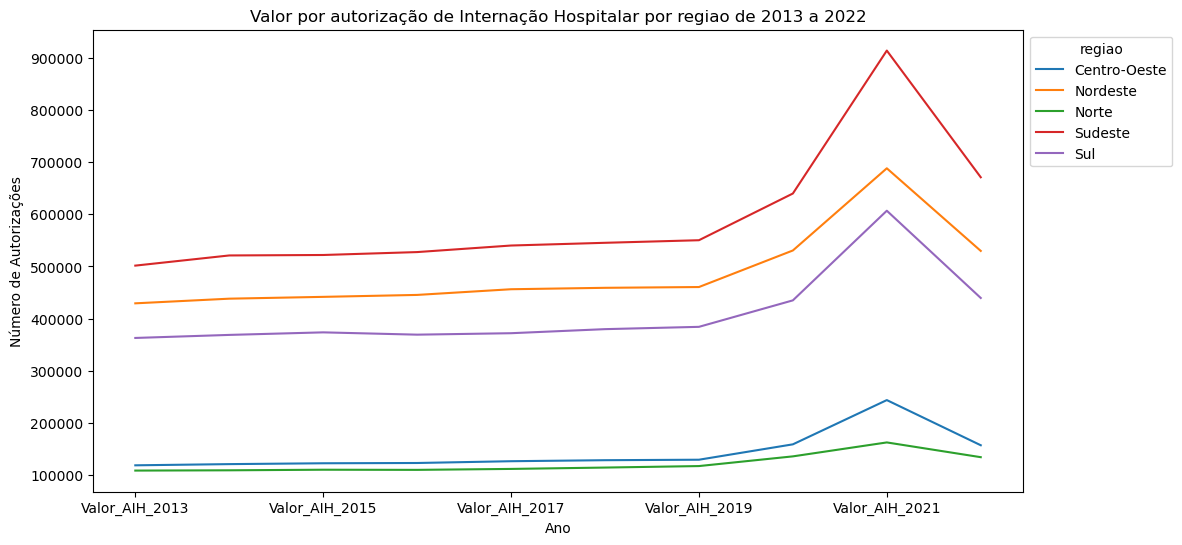

In [34]:
colunas = ['municipio', 'Valor_AIH_2013', 'Valor_AIH_2014', 'Valor_AIH_2015', 'Valor_AIH_2016', 'Valor_AIH_2017', 'Valor_AIH_2018', 'Valor_AIH_2019', 'Valor_AIH_2020', 'Valor_AIH_2021', 'Valor_AIH_2022', 'cod_ibge', 'Cod_UF', 'UF', 'regiao' ]
dados_Valor_AIH=dados_totais.loc[:,colunas]


dados_Valor_AIH = dados_Valor_AIH.dropna().groupby('regiao')[['Valor_AIH_2013', 'Valor_AIH_2014', 'Valor_AIH_2015', 'Valor_AIH_2016', 'Valor_AIH_2017', 'Valor_AIH_2018', 'Valor_AIH_2019', 'Valor_AIH_2020', 'Valor_AIH_2021', 'Valor_AIH_2022']].sum()


# Gráfico de barras
dados_Valor_AIH.plot(kind='bar', figsize=(12, 6))
plt.title('Valor por autorização de Internação Hospitalar por regiao de 2013 a 2022')
plt.xlabel('regiao')
plt.ylabel('Número de Autorizações')
plt.show()

# Gráfico de linhas
dados_Valor_AIH.T.plot(figsize=(12, 6))
plt.title('Valor por autorização de Internação Hospitalar por regiao de 2013 a 2022')
plt.xlabel('Ano')
plt.ylabel('Número de Autorizações')
plt.legend(title='regiao', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

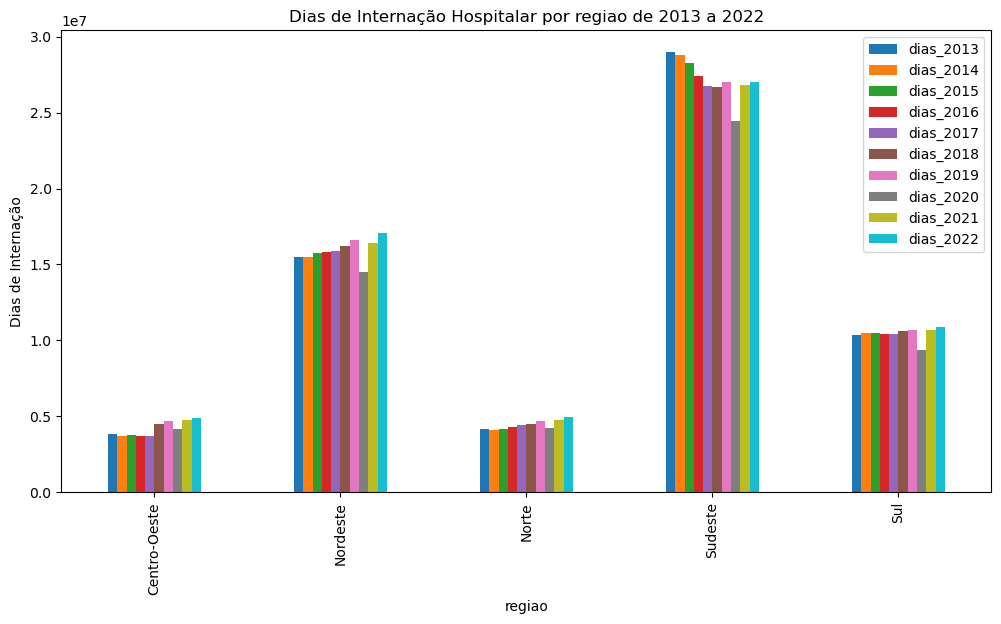

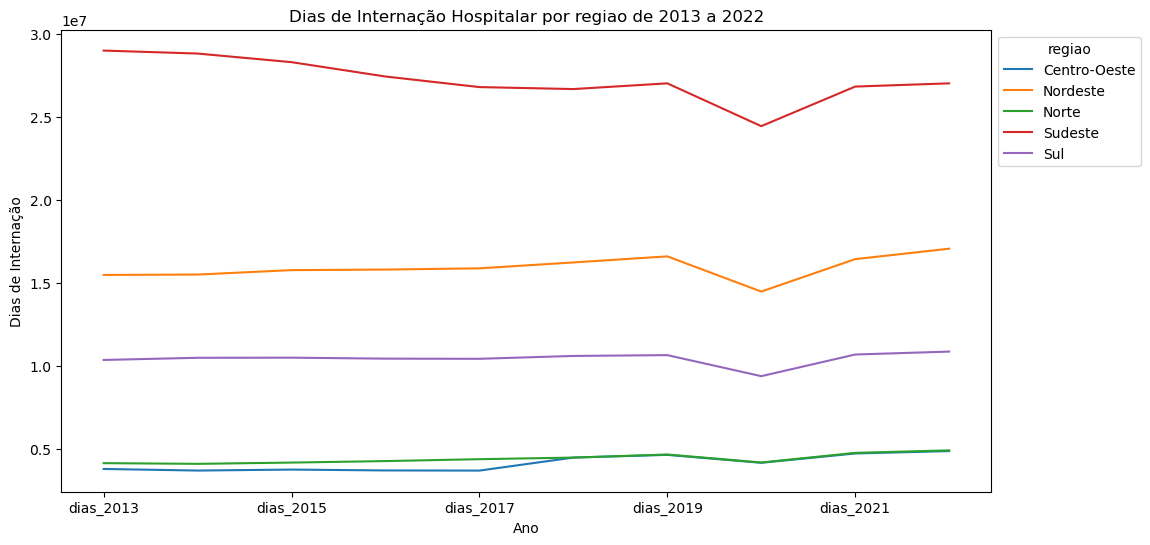

In [35]:
colunas = ['municipio', 'dias_2013', 'dias_2014', 'dias_2015', 'dias_2016', 'dias_2017', 'dias_2018', 'dias_2019', 'dias_2020', 'dias_2021', 'dias_2022', 'cod_ibge', 'Cod_UF', 'UF', 'regiao' ]
dados_dias=dados_totais.loc[:,colunas]


dados_dias = dados_dias.dropna().groupby('regiao')[['dias_2013', 'dias_2014', 'dias_2015', 'dias_2016', 'dias_2017', 'dias_2018', 'dias_2019', 'dias_2020', 'dias_2021', 'dias_2022']].sum()


# Gráfico de barras
dados_dias.plot(kind='bar', figsize=(12, 6))
plt.title('Dias de Internação Hospitalar por regiao de 2013 a 2022')
plt.xlabel('regiao')
plt.ylabel('Dias de Internação')
plt.show()

# Gráfico de linhas
dados_dias.T.plot(figsize=(12, 6))
plt.title('Dias de Internação Hospitalar por regiao de 2013 a 2022')
plt.xlabel('Ano')
plt.ylabel('Dias de Internação')
plt.legend(title='regiao', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [36]:
anos = range(2013, 2023)
for ano in anos:
    dados_totais.loc[:, f'valor_dias_{ano}'] = dados_totais[f'valor_{ano}'] / dados_totais[f'dias_{ano}']
dados_totais

C:\Users\Rosana\AppData\Local\Temp\ipykernel_14056\3962461232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_totais.loc[:, f'valor_dias_{ano}'] = dados_totais[f'valor_{ano}'] / dados_totais[f'dias_{ano}']
C:\Users\Rosana\AppData\Local\Temp\ipykernel_14056\3962461232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_totais.loc[:, f'valor_dias_{ano}'] = dados_totais[f'valor_{ano}'] / dados_totais[f'dias_{ano}']
C:\Users\Rosana\AppData\Local\Temp\ipykernel_14056\3962461232.py:3: SettingWithC

,municipio,valor_2013,valor_2014,valor_2015,valor_2016,valor_2017,valor_2018,valor_2019,valor_2020,valor_2021,...,valor_dias_2013,valor_dias_2014,valor_dias_2015,valor_dias_2016,valor_dias_2017,valor_dias_2018,valor_dias_2019,valor_dias_2020,valor_dias_2021,valor_dias_2022
0,ALTA FLORESTA D'OESTE,725487.04,760888.27,724116.20,626269.75,626343.21,6.536694e+05,6.961739e+05,4.803190e+05,6.682437e+05,...,134.974333,138.142387,130.072966,134.076161,135.748420,132.321739,125.368975,145.816348,178.198312,114.534208
1,ARIQUEMES,3708151.19,3463928.54,3973057.43,4382048.70,4502478.44,4.342874e+06,4.548937e+06,7.196513e+06,1.478188e+07,...,227.605646,241.153477,249.344636,268.048000,256.113677,274.848030,263.584235,436.787632,603.095823,336.221090
2,CABIXI,89864.83,89403.87,92187.84,100223.63,97387.75,8.062843e+04,8.619075e+04,7.649719e+04,1.449199e+05,...,131.766613,138.396084,128.395320,133.453569,131.783153,112.452483,110.785026,111.026401,231.132137,109.344450
3,CACOAL,5081347.01,7392914.64,7533927.08,9580907.92,10054183.76,1.124636e+07,1.160320e+07,8.557085e+06,1.115655e+07,...,94.231641,139.423190,129.007810,141.635123,143.242396,146.049099,153.096737,160.771905,219.237381,164.488430
4,CEREJEIRAS,522643.32,491123.65,565965.05,483308.62,446184.84,4.601988e+05,3.538571e+05,2.869115e+05,4.746083e+05,...,125.364193,118.229092,131.040762,120.405735,111.937993,112.683345,103.376301,119.596286,184.888329,136.268107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590,VIANOPOLIS,423968.57,394169.84,324303.99,284435.18,288963.32,3.314020e+05,2.995028e+05,2.739463e+05,4.186292e+05,...,123.318374,119.917810,121.280475,109.356086,112.305993,107.667950,107.696084,105.000483,147.404658,79.280058
5591,VICENTINOPOLIS,64744.19,65571.74,44772.18,39252.53,76204.07,1.041283e+05,1.272859e+05,1.406667e+05,1.568381e+05,...,154.890407,177.220919,123.680055,127.858404,159.756960,163.981638,180.547376,188.308822,293.704326,222.506734
5592,VILA BOA,51512.08,13115.73,9375.07,11457.24,24336.97,NaN,NaN,NaN,NaN,...,171.136478,136.622187,115.741605,148.795325,146.608253,NaN,NaN,NaN,NaN,NaN
5593,VILA PROPICIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


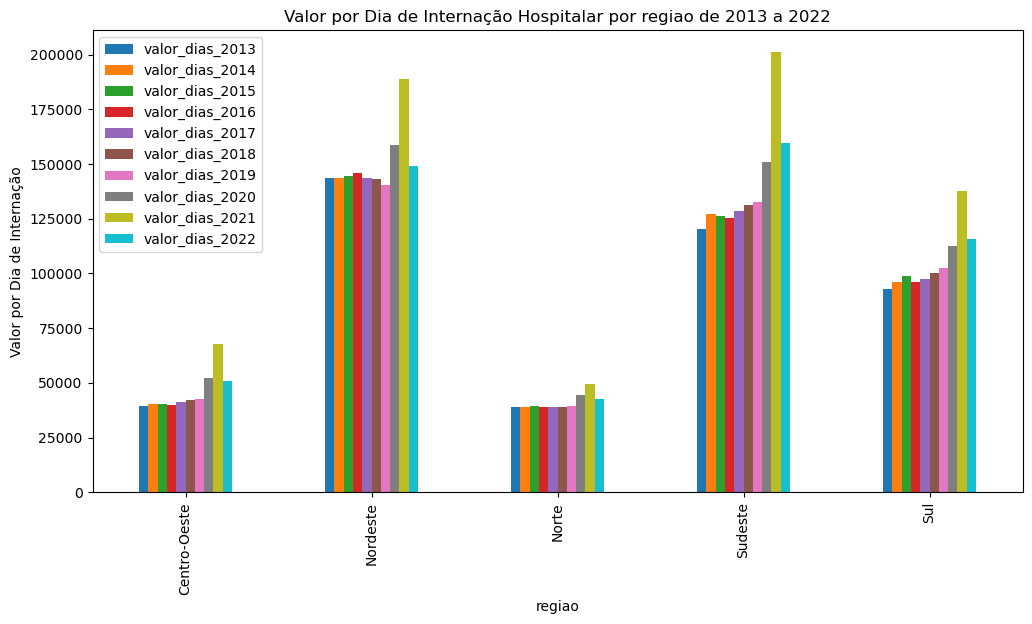

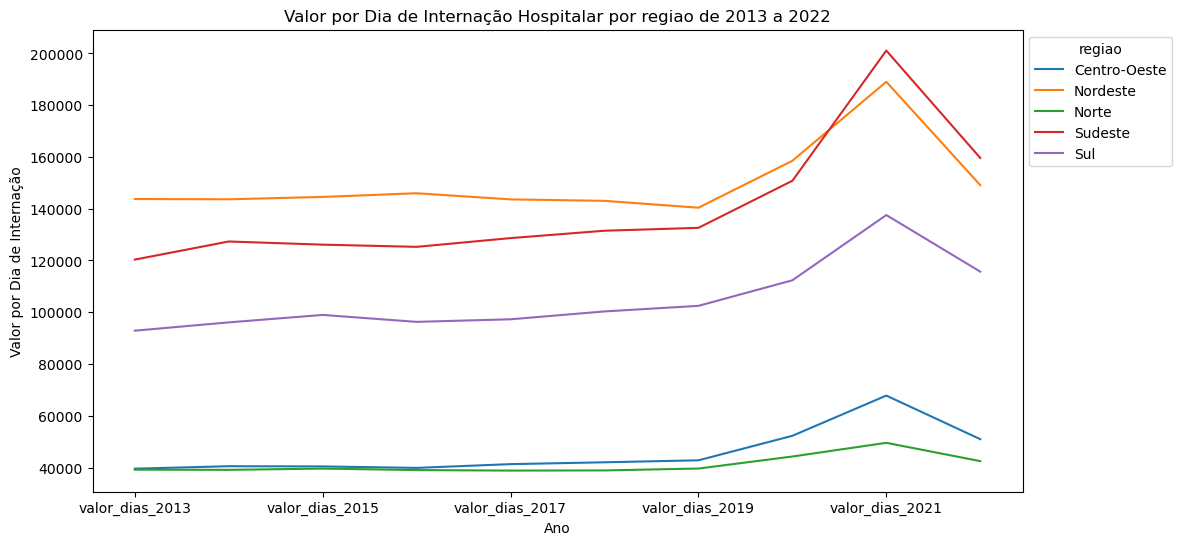

In [37]:
colunas = ['municipio', 'valor_dias_2013', 'valor_dias_2014', 'valor_dias_2015', 'valor_dias_2016', 'valor_dias_2017', 'valor_dias_2018', 'valor_dias_2019', 'valor_dias_2020', 'valor_dias_2021', 'valor_dias_2022', 'cod_ibge', 'Cod_UF', 'UF', 'regiao' ]
dados_valor_dias=dados_totais.loc[:,colunas]


dados_valor_dias = dados_valor_dias.dropna().groupby('regiao')[['valor_dias_2013', 'valor_dias_2014', 'valor_dias_2015', 'valor_dias_2016', 'valor_dias_2017', 'valor_dias_2018', 'valor_dias_2019', 'valor_dias_2020', 'valor_dias_2021', 'valor_dias_2022']].sum()


# Gráfico de barras
dados_valor_dias.plot(kind='bar', figsize=(12, 6))
plt.title('Valor por Dia de Internação Hospitalar por regiao de 2013 a 2022')
plt.xlabel('regiao')
plt.ylabel('Valor por Dia de Internação')
plt.show()

# Gráfico de linhas
dados_valor_dias.T.plot(figsize=(12, 6))
plt.title('Valor por Dia de Internação Hospitalar por regiao de 2013 a 2022')
plt.xlabel('Ano')
plt.ylabel('Valor por Dia de Internação')
plt.legend(title='regiao', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [38]:
dados_pop = pd.read_csv('ibge_cnv_popsvs.csv', encoding='cp850', sep=';', engine='python')
dados_pop

,MunicÝpio,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,110001 ALTA FLORESTA D'OESTE,24293.0,24066.0,23835.0,23614.0,23392.0,23167.0,22945.0,22728.0,22516.0
1,110002 ARIQUEMES,97540.0,99278.0,101048.0,102744.0,104441.0,106168.0,107863.0,109523.0,111148.0
2,110003 CABIXI,6080.0,5951.0,5819.0,5693.0,5567.0,5438.0,5312.0,5188.0,5067.0
3,110004 CACOAL,82035.0,82595.0,83164.0,83710.0,84257.0,84813.0,85359.0,85893.0,86416.0
4,110005 CEREJEIRAS,17060.0,16936.0,16810.0,16689.0,16567.0,16444.0,16323.0,16204.0,16088.0
...,...,...,...,...,...,...,...,...,...,...
5569,530010 BRASILIA,2765696.0,2808040.0,2850959.0,2892607.0,2933497.0,2974703.0,3015268.0,3055149.0,3094325.0
5570,Total,200004188.0,201717541.0,203475683.0,205156587.0,206804741.0,208494900.0,210147125.0,211755692.0,213317639.0
5571,Fonte:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5572,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
dados_pop = dados_pop.rename(columns={'MunicÝpio': 'municipio'})

dados_pop

,municipio,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,110001 ALTA FLORESTA D'OESTE,24293.0,24066.0,23835.0,23614.0,23392.0,23167.0,22945.0,22728.0,22516.0
1,110002 ARIQUEMES,97540.0,99278.0,101048.0,102744.0,104441.0,106168.0,107863.0,109523.0,111148.0
2,110003 CABIXI,6080.0,5951.0,5819.0,5693.0,5567.0,5438.0,5312.0,5188.0,5067.0
3,110004 CACOAL,82035.0,82595.0,83164.0,83710.0,84257.0,84813.0,85359.0,85893.0,86416.0
4,110005 CEREJEIRAS,17060.0,16936.0,16810.0,16689.0,16567.0,16444.0,16323.0,16204.0,16088.0
...,...,...,...,...,...,...,...,...,...,...
5569,530010 BRASILIA,2765696.0,2808040.0,2850959.0,2892607.0,2933497.0,2974703.0,3015268.0,3055149.0,3094325.0
5570,Total,200004188.0,201717541.0,203475683.0,205156587.0,206804741.0,208494900.0,210147125.0,211755692.0,213317639.0
5571,Fonte:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5572,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
dados_pop = dados_pop.iloc[:-4]
dados_pop

,municipio,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,110001 ALTA FLORESTA D'OESTE,24293.0,24066.0,23835.0,23614.0,23392.0,23167.0,22945.0,22728.0,22516.0
1,110002 ARIQUEMES,97540.0,99278.0,101048.0,102744.0,104441.0,106168.0,107863.0,109523.0,111148.0
2,110003 CABIXI,6080.0,5951.0,5819.0,5693.0,5567.0,5438.0,5312.0,5188.0,5067.0
3,110004 CACOAL,82035.0,82595.0,83164.0,83710.0,84257.0,84813.0,85359.0,85893.0,86416.0
4,110005 CEREJEIRAS,17060.0,16936.0,16810.0,16689.0,16567.0,16444.0,16323.0,16204.0,16088.0
...,...,...,...,...,...,...,...,...,...,...
5565,522200 VIANOPOLIS,13140.0,13264.0,13389.0,13510.0,13627.0,13746.0,13863.0,13977.0,14088.0
5566,522205 VICENTINOPOLIS,7923.0,8064.0,8206.0,8344.0,8478.0,8613.0,8745.0,8875.0,9002.0
5567,522220 VILA BOA,5274.0,5428.0,5583.0,5733.0,5879.0,6026.0,6171.0,6312.0,6451.0
5568,522230 VILA PROPICIO,5434.0,5500.0,5567.0,5632.0,5695.0,5758.0,5821.0,5882.0,5941.0


In [41]:
# Separar o código do IBGE em uma coluna separada para usá-lo como key
dados_pop['cod_ibge'] = dados_pop['municipio'].str.split(" ", n=1, expand = True)[0]
dados_pop['municipio'] = dados_pop['municipio'].str.split(" ", n=1, expand = True)[1]
dados_pop

C:\Users\Rosana\AppData\Local\Temp\ipykernel_14056\2093177644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_pop['cod_ibge'] = dados_pop['municipio'].str.split(" ", n=1, expand = True)[0]
C:\Users\Rosana\AppData\Local\Temp\ipykernel_14056\2093177644.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_pop['municipio'] = dados_pop['municipio'].str.split(" ", n=1, expand = True)[1]


,municipio,2013,2014,2015,2016,2017,2018,2019,2020,2021,cod_ibge
0,ALTA FLORESTA D'OESTE,24293.0,24066.0,23835.0,23614.0,23392.0,23167.0,22945.0,22728.0,22516.0,110001
1,ARIQUEMES,97540.0,99278.0,101048.0,102744.0,104441.0,106168.0,107863.0,109523.0,111148.0,110002
2,CABIXI,6080.0,5951.0,5819.0,5693.0,5567.0,5438.0,5312.0,5188.0,5067.0,110003
3,CACOAL,82035.0,82595.0,83164.0,83710.0,84257.0,84813.0,85359.0,85893.0,86416.0,110004
4,CEREJEIRAS,17060.0,16936.0,16810.0,16689.0,16567.0,16444.0,16323.0,16204.0,16088.0,110005
...,...,...,...,...,...,...,...,...,...,...,...
5565,VIANOPOLIS,13140.0,13264.0,13389.0,13510.0,13627.0,13746.0,13863.0,13977.0,14088.0,522200
5566,VICENTINOPOLIS,7923.0,8064.0,8206.0,8344.0,8478.0,8613.0,8745.0,8875.0,9002.0,522205
5567,VILA BOA,5274.0,5428.0,5583.0,5733.0,5879.0,6026.0,6171.0,6312.0,6451.0,522220
5568,VILA PROPICIO,5434.0,5500.0,5567.0,5632.0,5695.0,5758.0,5821.0,5882.0,5941.0,522230


In [42]:
dados_valor_pop = pd.merge(dados_pop, dados_valor, on='cod_ibge', how='left')
dados_valor_pop

,municipio_x,2013,2014,2015,2016,2017,2018,2019,2020,2021,...,valor_2016,valor_2017,valor_2018,valor_2019,valor_2020,valor_2021,valor_2022,Cod_UF,UF,regiao
0,ALTA FLORESTA D'OESTE,24293.0,24066.0,23835.0,23614.0,23392.0,23167.0,22945.0,22728.0,22516.0,...,626269.75,626343.21,6.536694e+05,6.961739e+05,4.803190e+05,6.682437e+05,5.780542e+05,11,RO,Norte
1,ARIQUEMES,97540.0,99278.0,101048.0,102744.0,104441.0,106168.0,107863.0,109523.0,111148.0,...,4382048.70,4502478.44,4.342874e+06,4.548937e+06,7.196513e+06,1.478188e+07,6.742578e+06,11,RO,Norte
2,CABIXI,6080.0,5951.0,5819.0,5693.0,5567.0,5438.0,5312.0,5188.0,5067.0,...,100223.63,97387.75,8.062843e+04,8.619075e+04,7.649719e+04,1.449199e+05,6.757487e+04,11,RO,Norte
3,CACOAL,82035.0,82595.0,83164.0,83710.0,84257.0,84813.0,85359.0,85893.0,86416.0,...,9580907.92,10054183.76,1.124636e+07,1.160320e+07,8.557085e+06,1.115655e+07,1.118933e+07,11,RO,Norte
4,CEREJEIRAS,17060.0,16936.0,16810.0,16689.0,16567.0,16444.0,16323.0,16204.0,16088.0,...,483308.62,446184.84,4.601988e+05,3.538571e+05,2.869115e+05,4.746083e+05,4.355129e+05,11,RO,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,VIANOPOLIS,13140.0,13264.0,13389.0,13510.0,13627.0,13746.0,13863.0,13977.0,14088.0,...,284435.18,288963.32,3.314020e+05,2.995028e+05,2.739463e+05,4.186292e+05,2.859632e+05,52,GO,Centro-Oeste
5566,VICENTINOPOLIS,7923.0,8064.0,8206.0,8344.0,8478.0,8613.0,8745.0,8875.0,9002.0,...,39252.53,76204.07,1.041283e+05,1.272859e+05,1.406667e+05,1.568381e+05,1.212662e+05,52,GO,Centro-Oeste
5567,VILA BOA,5274.0,5428.0,5583.0,5733.0,5879.0,6026.0,6171.0,6312.0,6451.0,...,11457.24,24336.97,NaN,NaN,NaN,NaN,NaN,52,GO,Centro-Oeste
5568,VILA PROPICIO,5434.0,5500.0,5567.0,5632.0,5695.0,5758.0,5821.0,5882.0,5941.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,GO,Centro-Oeste


In [43]:
anos = range(2013, 2022)
for ano in anos:
    dados_valor_pop.loc[:, f'valor_pop_{ano}'] = dados_valor_pop[f'valor_{ano}'] / ano
dados_valor_pop

,municipio_x,2013,2014,2015,2016,2017,2018,2019,2020,2021,...,regiao,valor_pop_2013,valor_pop_2014,valor_pop_2015,valor_pop_2016,valor_pop_2017,valor_pop_2018,valor_pop_2019,valor_pop_2020,valor_pop_2021
0,ALTA FLORESTA D'OESTE,24293.0,24066.0,23835.0,23614.0,23392.0,23167.0,22945.0,22728.0,22516.0,...,Norte,360.400914,377.799538,359.362878,310.649678,310.532082,323.919420,344.811253,237.781708,330.650010
1,ARIQUEMES,97540.0,99278.0,101048.0,102744.0,104441.0,106168.0,107863.0,109523.0,111148.0,...,Norte,1842.101932,1719.924796,1971.740660,2173.635268,2232.264968,2152.068246,2253.064250,3562.630213,7314.140826
2,CABIXI,6080.0,5951.0,5819.0,5693.0,5567.0,5438.0,5312.0,5188.0,5067.0,...,Norte,44.642240,44.391197,45.750789,49.714102,48.283466,39.954623,42.689822,37.869896,71.707001
3,CACOAL,82035.0,82595.0,83164.0,83710.0,84257.0,84813.0,85359.0,85893.0,86416.0,...,Norte,2524.265777,3670.761986,3738.921628,4752.434484,4984.721745,5573.025183,5747.004294,4236.180505,5520.312642
4,CEREJEIRAS,17060.0,16936.0,16810.0,16689.0,16567.0,16444.0,16323.0,16204.0,16088.0,...,Norte,259.634039,243.854841,280.875955,239.736419,221.212117,228.046967,175.263536,142.035391,234.838367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,VIANOPOLIS,13140.0,13264.0,13389.0,13510.0,13627.0,13746.0,13863.0,13977.0,14088.0,...,Centro-Oeste,210.615286,195.714916,160.944908,141.088879,143.263917,164.222968,148.342155,135.616960,207.139649
5566,VICENTINOPOLIS,7923.0,8064.0,8206.0,8344.0,8478.0,8613.0,8745.0,8875.0,9002.0,...,Centro-Oeste,32.163035,32.557964,22.219444,19.470501,37.780897,51.599772,63.044032,69.636975,77.604211
5567,VILA BOA,5274.0,5428.0,5583.0,5733.0,5879.0,6026.0,6171.0,6312.0,6451.0,...,Centro-Oeste,25.589707,6.512279,4.652640,5.683155,12.065925,NaN,NaN,NaN,NaN
5568,VILA PROPICIO,5434.0,5500.0,5567.0,5632.0,5695.0,5758.0,5821.0,5882.0,5941.0,...,Centro-Oeste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
dados_valor_pop = dados_valor_pop.dropna(how='any')
dados_valor_pop

,municipio_x,2013,2014,2015,2016,2017,2018,2019,2020,2021,...,regiao,valor_pop_2013,valor_pop_2014,valor_pop_2015,valor_pop_2016,valor_pop_2017,valor_pop_2018,valor_pop_2019,valor_pop_2020,valor_pop_2021
0,ALTA FLORESTA D'OESTE,24293.0,24066.0,23835.0,23614.0,23392.0,23167.0,22945.0,22728.0,22516.0,...,Norte,360.400914,377.799538,359.362878,310.649678,310.532082,323.919420,344.811253,237.781708,330.650010
1,ARIQUEMES,97540.0,99278.0,101048.0,102744.0,104441.0,106168.0,107863.0,109523.0,111148.0,...,Norte,1842.101932,1719.924796,1971.740660,2173.635268,2232.264968,2152.068246,2253.064250,3562.630213,7314.140826
2,CABIXI,6080.0,5951.0,5819.0,5693.0,5567.0,5438.0,5312.0,5188.0,5067.0,...,Norte,44.642240,44.391197,45.750789,49.714102,48.283466,39.954623,42.689822,37.869896,71.707001
3,CACOAL,82035.0,82595.0,83164.0,83710.0,84257.0,84813.0,85359.0,85893.0,86416.0,...,Norte,2524.265777,3670.761986,3738.921628,4752.434484,4984.721745,5573.025183,5747.004294,4236.180505,5520.312642
4,CEREJEIRAS,17060.0,16936.0,16810.0,16689.0,16567.0,16444.0,16323.0,16204.0,16088.0,...,Norte,259.634039,243.854841,280.875955,239.736419,221.212117,228.046967,175.263536,142.035391,234.838367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5558,TURVELANDIA,4748.0,4839.0,4932.0,5021.0,5107.0,5195.0,5281.0,5365.0,5447.0,...,Centro-Oeste,19.447635,25.520859,23.008248,17.692867,16.255295,31.765387,30.548970,25.977950,51.825873
5560,URUACU,38590.0,38924.0,39263.0,39588.0,39906.0,40226.0,40541.0,40849.0,41150.0,...,Centro-Oeste,356.703497,456.049518,390.561643,353.760149,361.391418,463.884212,369.194264,408.534495,7261.711316
5565,VIANOPOLIS,13140.0,13264.0,13389.0,13510.0,13627.0,13746.0,13863.0,13977.0,14088.0,...,Centro-Oeste,210.615286,195.714916,160.944908,141.088879,143.263917,164.222968,148.342155,135.616960,207.139649
5566,VICENTINOPOLIS,7923.0,8064.0,8206.0,8344.0,8478.0,8613.0,8745.0,8875.0,9002.0,...,Centro-Oeste,32.163035,32.557964,22.219444,19.470501,37.780897,51.599772,63.044032,69.636975,77.604211


In [45]:
#criando um df so com os dados de valores
colunas = ['municipio_x', 'valor_pop_2013', 'valor_pop_2014', 'valor_pop_2015', 'valor_pop_2016', 'valor_pop_2017', 'valor_pop_2018', 'valor_pop_2019', 'valor_pop_2020', 'valor_pop_2021', 'cod_ibge', 'Cod_UF', 'UF', 'regiao' ]
dados_valor_pop_2=dados_valor_pop.loc[:,colunas]
dados_valor_pop_2

,municipio_x,valor_pop_2013,valor_pop_2014,valor_pop_2015,valor_pop_2016,valor_pop_2017,valor_pop_2018,valor_pop_2019,valor_pop_2020,valor_pop_2021,cod_ibge,Cod_UF,UF,regiao
0,ALTA FLORESTA D'OESTE,360.400914,377.799538,359.362878,310.649678,310.532082,323.919420,344.811253,237.781708,330.650010,110001,11,RO,Norte
1,ARIQUEMES,1842.101932,1719.924796,1971.740660,2173.635268,2232.264968,2152.068246,2253.064250,3562.630213,7314.140826,110002,11,RO,Norte
2,CABIXI,44.642240,44.391197,45.750789,49.714102,48.283466,39.954623,42.689822,37.869896,71.707001,110003,11,RO,Norte
3,CACOAL,2524.265777,3670.761986,3738.921628,4752.434484,4984.721745,5573.025183,5747.004294,4236.180505,5520.312642,110004,11,RO,Norte
4,CEREJEIRAS,259.634039,243.854841,280.875955,239.736419,221.212117,228.046967,175.263536,142.035391,234.838367,110005,11,RO,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5558,TURVELANDIA,19.447635,25.520859,23.008248,17.692867,16.255295,31.765387,30.548970,25.977950,51.825873,522155,52,GO,Centro-Oeste
5560,URUACU,356.703497,456.049518,390.561643,353.760149,361.391418,463.884212,369.194264,408.534495,7261.711316,522160,52,GO,Centro-Oeste
5565,VIANOPOLIS,210.615286,195.714916,160.944908,141.088879,143.263917,164.222968,148.342155,135.616960,207.139649,522200,52,GO,Centro-Oeste
5566,VICENTINOPOLIS,32.163035,32.557964,22.219444,19.470501,37.780897,51.599772,63.044032,69.636975,77.604211,522205,52,GO,Centro-Oeste


In [46]:
# Lista de anos
anos = list(range(2013, 2022))

# Renomear as colunas para tornar a manipulação mais conveniente
dados_valor_pop_2 = dados_valor_pop_2.rename(columns={f'valor_pop_{ano}': str(ano) for ano in anos})

# Converter o DataFrame para o formato longo
dados_valor_pop_longo = pd.melt(dados_valor_pop_2, id_vars=['cod_ibge', 'municipio_x', 'Cod_UF', 'UF', 'regiao'], value_vars=[str(ano) for ano in anos], var_name='ano', value_name='gastos_pop')

# Exibir o DataFrame no formato longo
dados_valor_pop_longo

,cod_ibge,municipio_x,Cod_UF,UF,regiao,ano,gastos_pop
0,110001,ALTA FLORESTA D'OESTE,11,RO,Norte,2013,360.400914
1,110002,ARIQUEMES,11,RO,Norte,2013,1842.101932
2,110003,CABIXI,11,RO,Norte,2013,44.642240
3,110004,CACOAL,11,RO,Norte,2013,2524.265777
4,110005,CEREJEIRAS,11,RO,Norte,2013,259.634039
...,...,...,...,...,...,...,...
25618,522155,TURVELANDIA,52,GO,Centro-Oeste,2021,51.825873
25619,522160,URUACU,52,GO,Centro-Oeste,2021,7261.711316
25620,522200,VIANOPOLIS,52,GO,Centro-Oeste,2021,207.139649
25621,522205,VICENTINOPOLIS,52,GO,Centro-Oeste,2021,77.604211


                            OLS Regression Results                            
Dep. Variable:             gastos_pop   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     14.20
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           0.000165
Time:                        16:51:25   Log-Likelihood:            -2.8603e+05
No. Observations:               25623   AIC:                         5.721e+05
Df Residuals:                   25621   BIC:                         5.721e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.11e+05   8.32e+04     -3.736      0.0

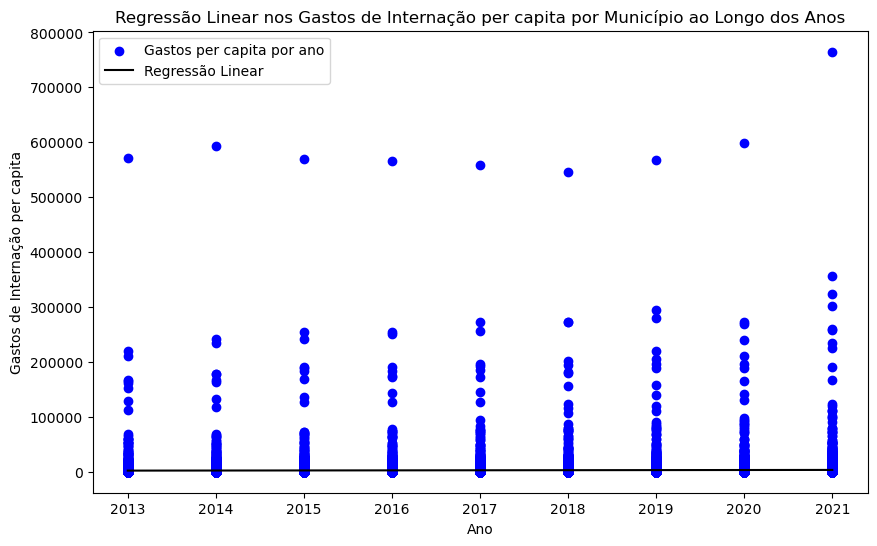

In [47]:
# Ajustar um modelo de regressão linear aos dados
X = dados_valor_pop_longo['ano'].astype(int)
y = dados_valor_pop_longo['gastos_pop']
X = sm.add_constant(X)  # Adicionar uma constante para o termo independente
model = sm.OLS(y, X)
results = model.fit()

# Exibir os resultados da regressão
print(results.summary())

# Visualizar os resultados da regressão e os pontos de dados originais
plt.figure(figsize=(10, 6))
plt.scatter(dados_valor_pop_longo['ano'], dados_valor_pop_longo['gastos_pop'], color='b', label='Gastos per capita por ano')
plt.plot(dados_valor_pop_longo['ano'], results.fittedvalues, color='k', label='Regressão Linear')
plt.xlabel('Ano')
plt.ylabel('Gastos de Internação per capita')
plt.title('Regressão Linear nos Gastos de Internação per capita por Município ao Longo dos Anos')
plt.legend()
plt.show()

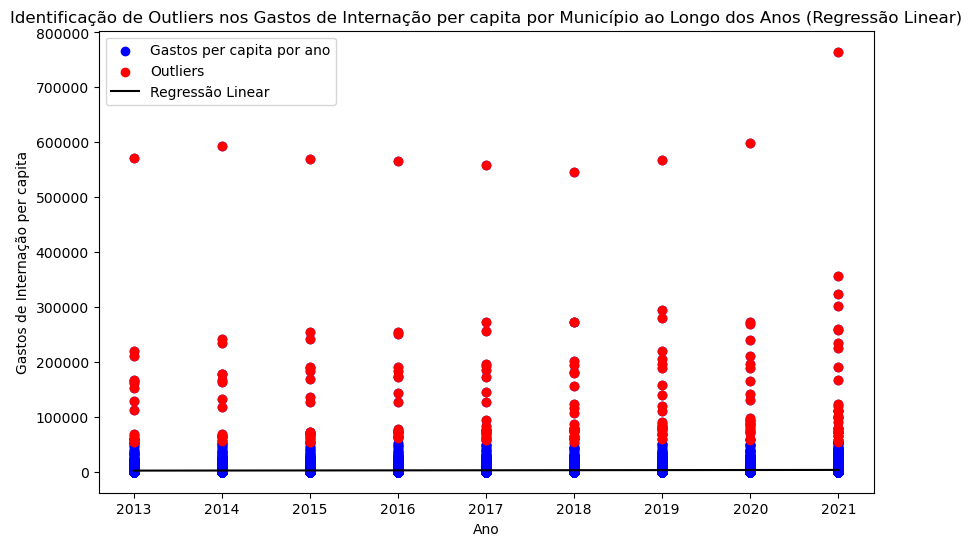

In [48]:
# Calcular os resíduos
residuals = results.resid

# Definir um limiar para identificar outliers (por exemplo, 3 desvios padrão dos resíduos)
limite_superior_residuos = 3 * residuals.std()

# Identificar outliers com base nos resíduos
outliers = dados_valor_pop_longo[abs(residuals) > limite_superior_residuos]

# Visualizar os outliers em um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(dados_valor_pop_longo['ano'], dados_valor_pop_longo['gastos_pop'], color='b', label='Gastos per capita por ano')
plt.scatter(outliers['ano'], outliers['gastos_pop'], color='r', label='Outliers')
plt.plot(dados_valor_pop_longo['ano'], results.fittedvalues, color='k', label='Regressão Linear')
plt.xlabel('Ano')
plt.ylabel('Gastos de Internação per capita')
plt.title('Identificação de Outliers nos Gastos de Internação per capita por Município ao Longo dos Anos (Regressão Linear)')
plt.legend()
plt.show()

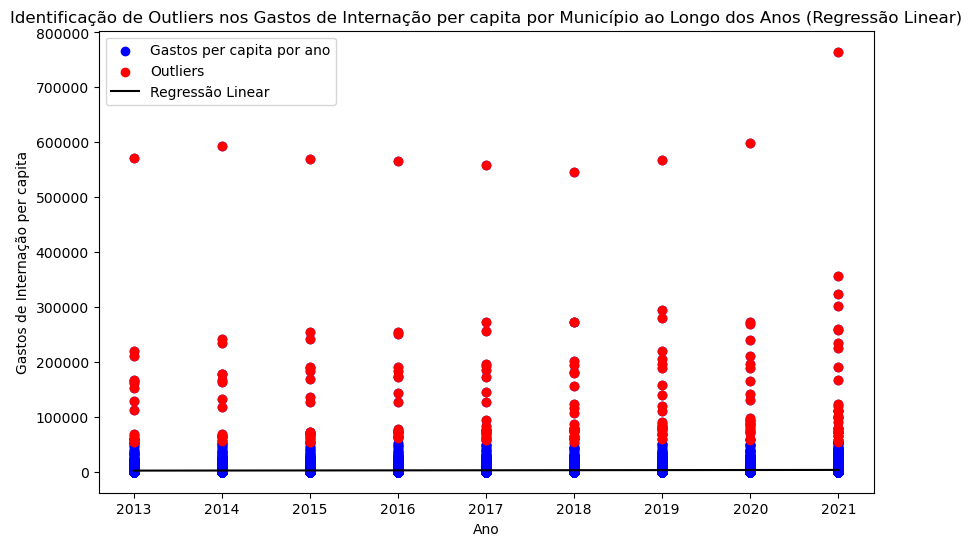

In [49]:
# Ajustar um modelo de regressão linear aos dados
X = dados_valor_pop_longo['ano'].values.reshape(-1, 1)
y = dados_valor_pop_longo['gastos_pop'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

# Calcular os resíduos
residuals = y - model.predict(X)

# Definir um limiar para identificar outliers (por exemplo, 3 desvios padrão dos resíduos)
limite_superior_residuos = 3 * residuals.std()

# Identificar outliers com base nos resíduos
outliers = dados_valor_pop_longo[abs(residuals) > limite_superior_residuos]

# Visualizar os outliers em um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(dados_valor_pop_longo['ano'], dados_valor_pop_longo['gastos_pop'], color='b', label='Gastos per capita por ano')
plt.scatter(outliers['ano'], outliers['gastos_pop'], color='r', label='Outliers')
plt.plot(dados_valor_pop_longo['ano'], model.predict(X), color='k', label='Regressão Linear')
plt.xlabel('Ano')
plt.ylabel('Gastos de Internação per capita')
plt.title('Identificação de Outliers nos Gastos de Internação per capita por Município ao Longo dos Anos (Regressão Linear)')
plt.legend()
plt.show()

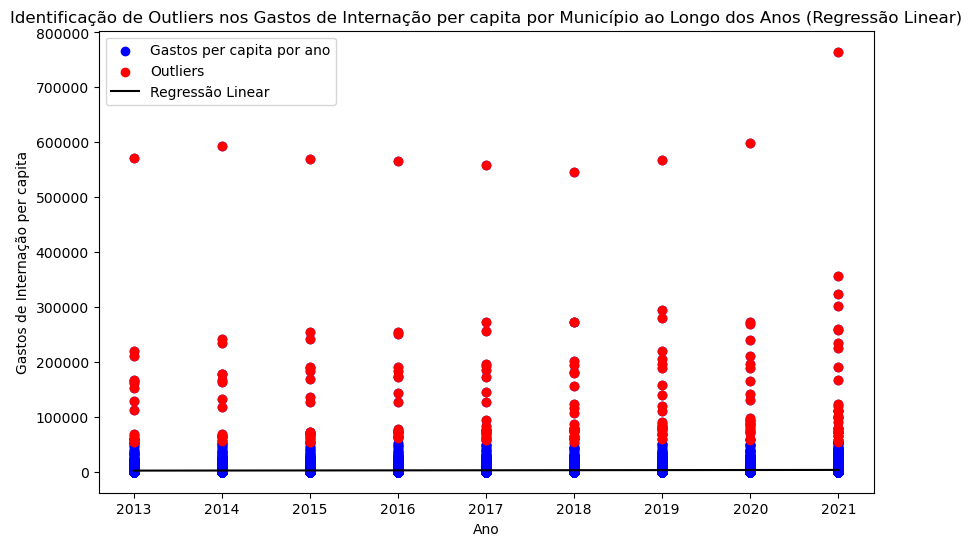

124             BELEM
391          SAO LUIS
518         FORTALEZA
661             NATAL
714       JOAO PESSOA
             ...     
25042       JOINVILLE
25253    PORTO ALEGRE
25358    CAMPO GRANDE
25533         GOIANIA
25622        BRASILIA
Name: municipio_x, Length: 199, dtype: object


In [50]:
# Ajustar um modelo de regressão linear aos dados
X = dados_valor_pop_longo['ano'].values.reshape(-1, 1)
y = dados_valor_pop_longo['gastos_pop'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

# Calcular os resíduos
residuals = y - model.predict(X)

# Definir um limiar para identificar outliers (por exemplo, 3 desvios padrão dos resíduos)
limite_superior_residuos = 3 * residuals.std()

# Identificar outliers com base nos resíduos
outliers_mask = abs(residuals) > limite_superior_residuos
outliers = dados_valor_pop_longo[outliers_mask]

# Obter os nomes dos municípios correspondentes aos outliers
municipios_outliers = outliers['municipio_x']

# Visualizar os outliers em um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(dados_valor_pop_longo['ano'], dados_valor_pop_longo['gastos_pop'], color='b', label='Gastos per capita por ano')
plt.scatter(outliers['ano'], outliers['gastos_pop'], color='r', label='Outliers')
plt.plot(dados_valor_pop_longo['ano'], model.predict(X), color='k', label='Regressão Linear')
plt.xlabel('Ano')
plt.ylabel('Gastos de Internação per capita')
plt.title('Identificação de Outliers nos Gastos de Internação per capita por Município ao Longo dos Anos (Regressão Linear)')
plt.legend()
plt.show()

# Exibir os nomes dos municípios outliers
print(municipios_outliers)

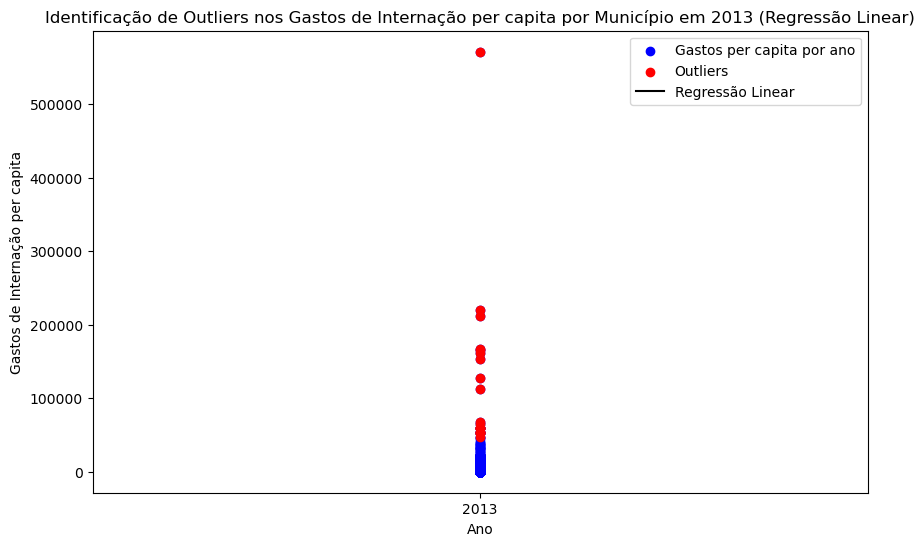

Municípios outliers em 2013:
83                     MANAUS
124                     BELEM
391                  SAO LUIS
467                  TERESINA
518                 FORTALEZA
661                     NATAL
714               JOAO PESSOA
847                    RECIFE
903                    MACEIO
1160                 SALVADOR
1254           BELO HORIZONTE
1676           RIO DE JANEIRO
1750                 CAMPINAS
1939           RIBEIRAO PRETO
1969    SAO JOSE DO RIO PRETO
1973                SAO PAULO
2064                 CURITIBA
2468              PASSO FUNDO
2477             PORTO ALEGRE
2582             CAMPO GRANDE
2757                  GOIANIA
Name: municipio_x, dtype: object




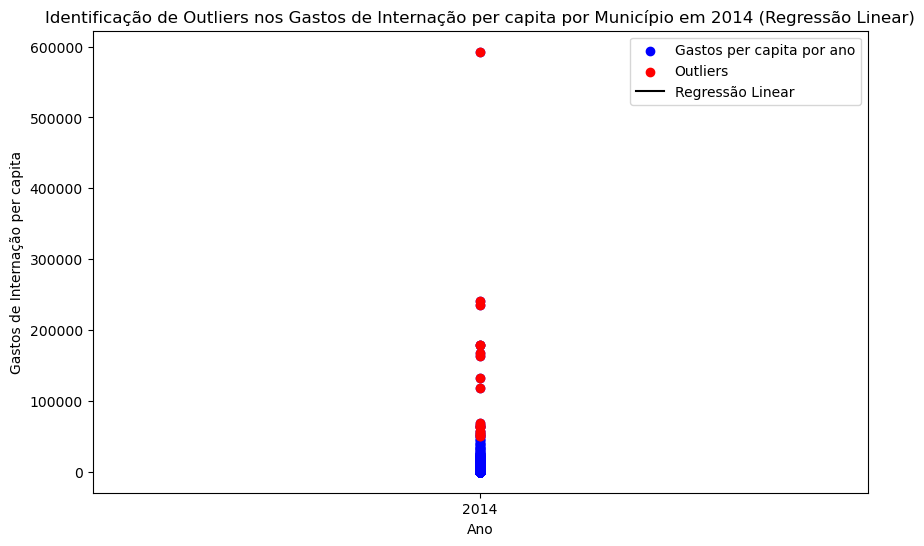

Municípios outliers em 2014:
2971                    BELEM
3238                 SAO LUIS
3314                 TERESINA
3365                FORTALEZA
3508                    NATAL
3561              JOAO PESSOA
3694                   RECIFE
3750                   MACEIO
4007                 SALVADOR
4101           BELO HORIZONTE
4523           RIO DE JANEIRO
4597                 CAMPINAS
4786           RIBEIRAO PRETO
4816    SAO JOSE DO RIO PRETO
4820                SAO PAULO
4886    CAMPINA GRANDE DO SUL
4911                 CURITIBA
5324             PORTO ALEGRE
5429             CAMPO GRANDE
5604                  GOIANIA
Name: municipio_x, dtype: object




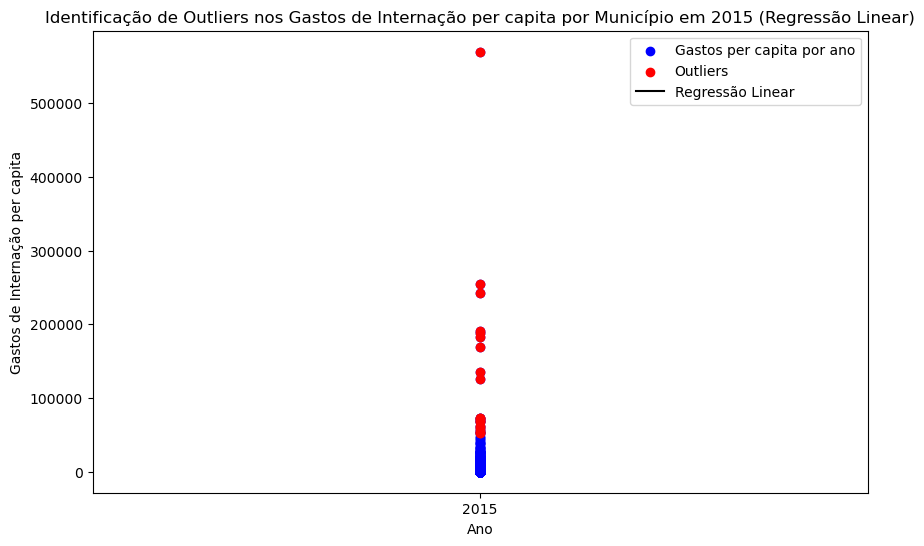

Municípios outliers em 2015:
5777                   MANAUS
5818                    BELEM
6085                 SAO LUIS
6161                 TERESINA
6212                FORTALEZA
6355                    NATAL
6408              JOAO PESSOA
6541                   RECIFE
6597                   MACEIO
6854                 SALVADOR
6948           BELO HORIZONTE
7370           RIO DE JANEIRO
7444                 CAMPINAS
7633           RIBEIRAO PRETO
7663    SAO JOSE DO RIO PRETO
7667                SAO PAULO
7733    CAMPINA GRANDE DO SUL
7734              CAMPO LARGO
7758                 CURITIBA
8171             PORTO ALEGRE
8276             CAMPO GRANDE
8451                  GOIANIA
Name: municipio_x, dtype: object




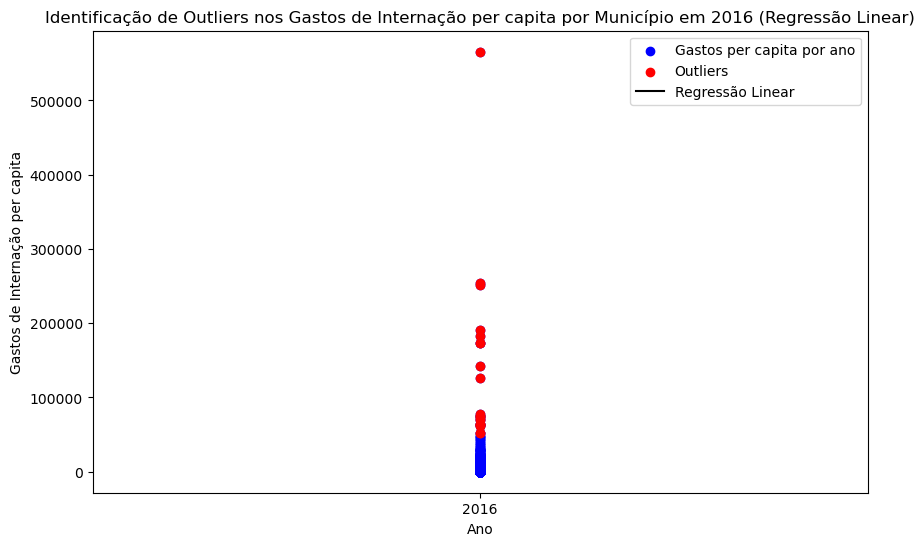

Municípios outliers em 2016:
8624                    MANAUS
8665                     BELEM
8932                  SAO LUIS
9008                  TERESINA
9059                 FORTALEZA
9202                     NATAL
9255               JOAO PESSOA
9388                    RECIFE
9444                    MACEIO
9701                  SALVADOR
9795            BELO HORIZONTE
10217           RIO DE JANEIRO
10291                 CAMPINAS
10480           RIBEIRAO PRETO
10510    SAO JOSE DO RIO PRETO
10514                SAO PAULO
10580    CAMPINA GRANDE DO SUL
10581              CAMPO LARGO
10605                 CURITIBA
11018             PORTO ALEGRE
11123             CAMPO GRANDE
11298                  GOIANIA
Name: municipio_x, dtype: object




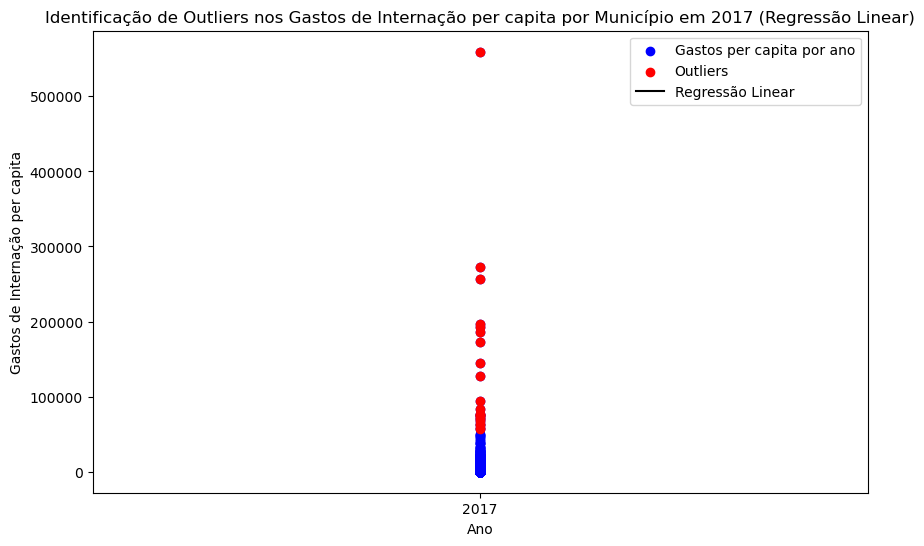

Municípios outliers em 2017:
11471                   MANAUS
11512                    BELEM
11779                 SAO LUIS
11855                 TERESINA
11906                FORTALEZA
12049                    NATAL
12102              JOAO PESSOA
12235                   RECIFE
12291                   MACEIO
12548                 SALVADOR
12642           BELO HORIZONTE
13064           RIO DE JANEIRO
13138                 CAMPINAS
13327           RIBEIRAO PRETO
13357    SAO JOSE DO RIO PRETO
13361                SAO PAULO
13427    CAMPINA GRANDE DO SUL
13428              CAMPO LARGO
13452                 CURITIBA
13865             PORTO ALEGRE
13970             CAMPO GRANDE
14145                  GOIANIA
Name: municipio_x, dtype: object




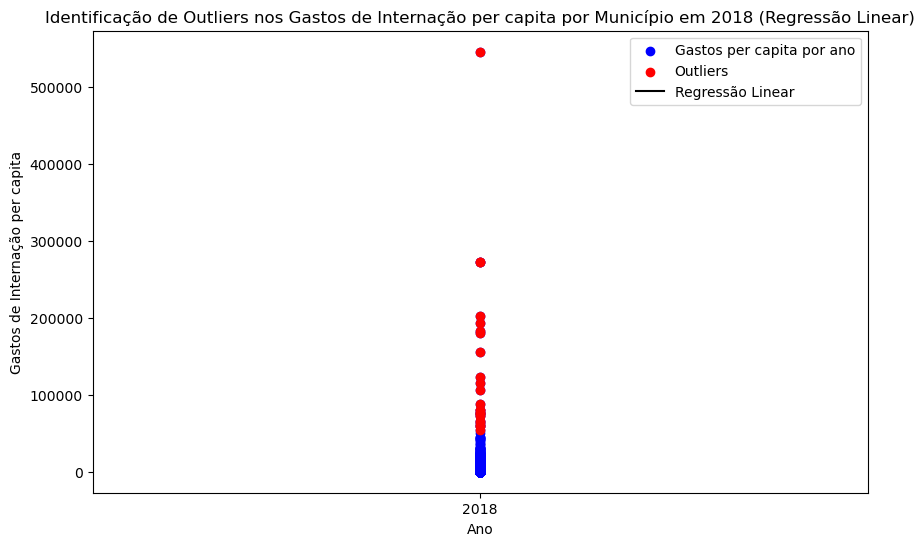

Municípios outliers em 2018:
14318                   MANAUS
14359                    BELEM
14626                 SAO LUIS
14702                 TERESINA
14753                FORTALEZA
14896                    NATAL
14949              JOAO PESSOA
15082                   RECIFE
15138                   MACEIO
15395                 SALVADOR
15489           BELO HORIZONTE
15911           RIO DE JANEIRO
15985                 CAMPINAS
16174           RIBEIRAO PRETO
16204    SAO JOSE DO RIO PRETO
16208                SAO PAULO
16274    CAMPINA GRANDE DO SUL
16275              CAMPO LARGO
16299                 CURITIBA
16343                 LONDRINA
16703              PASSO FUNDO
16712             PORTO ALEGRE
16817             CAMPO GRANDE
16992                  GOIANIA
17081                 BRASILIA
Name: municipio_x, dtype: object




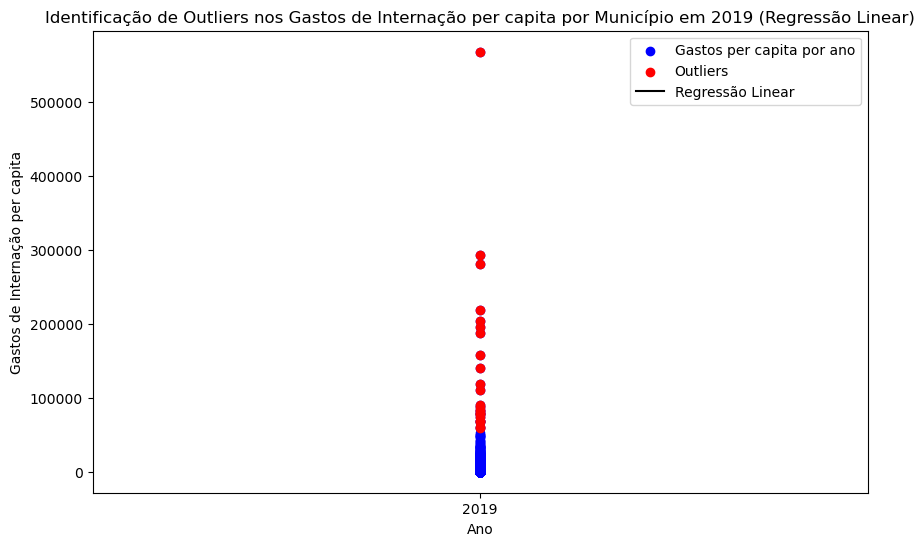

Municípios outliers em 2019:
17165                   MANAUS
17206                    BELEM
17473                 SAO LUIS
17549                 TERESINA
17600                FORTALEZA
17743                    NATAL
17796              JOAO PESSOA
17929                   RECIFE
17985                   MACEIO
18242                 SALVADOR
18336           BELO HORIZONTE
18758           RIO DE JANEIRO
18832                 CAMPINAS
19021           RIBEIRAO PRETO
19051    SAO JOSE DO RIO PRETO
19055                SAO PAULO
19121    CAMPINA GRANDE DO SUL
19122              CAMPO LARGO
19146                 CURITIBA
19190                 LONDRINA
19559             PORTO ALEGRE
19664             CAMPO GRANDE
19839                  GOIANIA
19928                 BRASILIA
Name: municipio_x, dtype: object




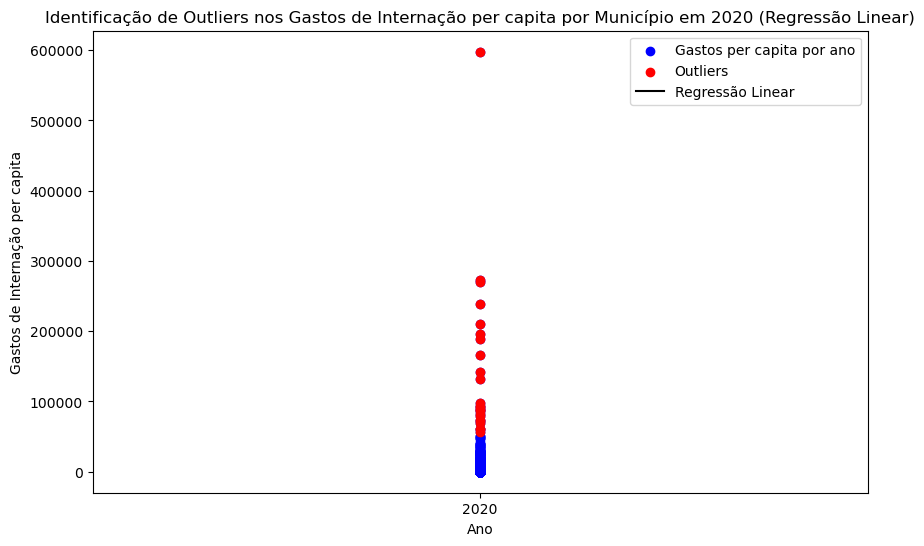

Municípios outliers em 2020:
20012                   MANAUS
20053                    BELEM
20320                 SAO LUIS
20396                 TERESINA
20447                FORTALEZA
20590                    NATAL
20643              JOAO PESSOA
20776                   RECIFE
20832                   MACEIO
21089                 SALVADOR
21183           BELO HORIZONTE
21605           RIO DE JANEIRO
21679                 CAMPINAS
21868           RIBEIRAO PRETO
21898    SAO JOSE DO RIO PRETO
21902                SAO PAULO
21968    CAMPINA GRANDE DO SUL
21969              CAMPO LARGO
21993                 CURITIBA
22037                 LONDRINA
22406             PORTO ALEGRE
22511             CAMPO GRANDE
22686                  GOIANIA
22775                 BRASILIA
Name: municipio_x, dtype: object




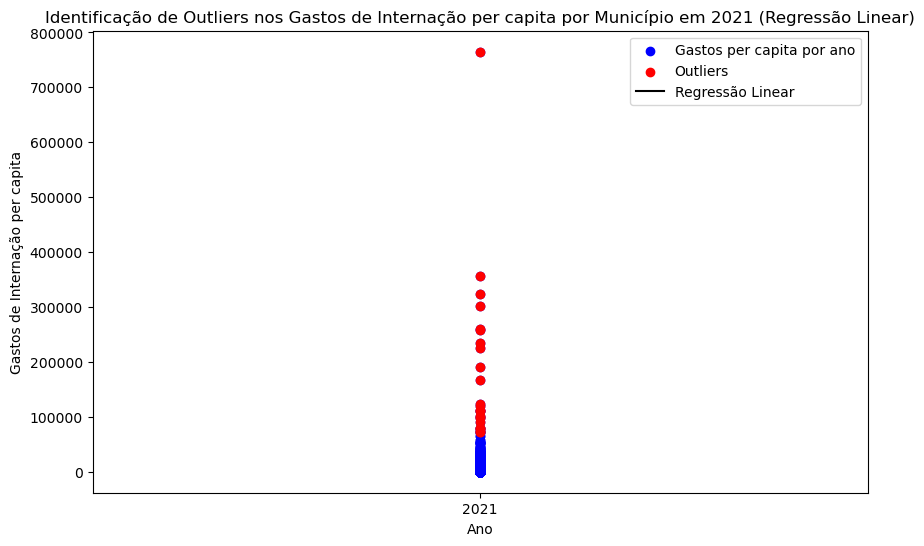

Municípios outliers em 2021:
22859                   MANAUS
22900                    BELEM
23167                 SAO LUIS
23243                 TERESINA
23294                FORTALEZA
23437                    NATAL
23490              JOAO PESSOA
23623                   RECIFE
23679                   MACEIO
23936                 SALVADOR
24030           BELO HORIZONTE
24173             JUIZ DE FORA
24452           RIO DE JANEIRO
24526                 CAMPINAS
24715           RIBEIRAO PRETO
24745    SAO JOSE DO RIO PRETO
24749                SAO PAULO
24816              CAMPO LARGO
24840                 CURITIBA
24884                 LONDRINA
25042                JOINVILLE
25253             PORTO ALEGRE
25358             CAMPO GRANDE
25533                  GOIANIA
25622                 BRASILIA
Name: municipio_x, dtype: object




In [51]:
anos = dados_valor_pop_longo['ano'].unique()

for ano in anos:
    # Filtrar os dados para o ano específico
    dados_ano = dados_valor_pop_longo[dados_valor_pop_longo['ano'] == ano]

    # Ajustar um modelo de regressão linear aos dados do ano específico
    X = dados_ano['ano'].values.reshape(-1, 1)
    y = dados_ano['gastos_pop'].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)

    # Calcular os resíduos
    residuals = y - model.predict(X)

    # Definir um limiar para identificar outliers (por exemplo, 3 desvios padrão dos resíduos)
    limite_superior_residuos = 3 * residuals.std()

    # Identificar outliers com base nos resíduos
    outliers_mask = abs(residuals) > limite_superior_residuos
    outliers = dados_ano[outliers_mask]

    # Obter os nomes dos municípios correspondentes aos outliers
    municipios_outliers = outliers['municipio_x']

    # Visualizar os outliers em um gráfico de dispersão para cada ano
    plt.figure(figsize=(10, 6))
    plt.scatter(dados_ano['ano'], dados_ano['gastos_pop'], color='b', label='Gastos per capita por ano')
    plt.scatter(outliers['ano'], outliers['gastos_pop'], color='r', label='Outliers')
    plt.plot(dados_ano['ano'], model.predict(X), color='k', label='Regressão Linear')
    plt.xlabel('Ano')
    plt.ylabel('Gastos de Internação per capita')
    plt.title(f'Identificação de Outliers nos Gastos de Internação per capita por Município em {ano} (Regressão Linear)')
    plt.legend()
    plt.show()

    # Exibir os nomes dos municípios outliers para o ano específico
    print(f"Municípios outliers em {ano}:")
    print(municipios_outliers)
    print("\n")

In [52]:
dados_valor
dados_valor.to_csv('dados_valor.csv', index=False)